# **Detection of Lung Cancer Mutation**
---
### Full, Remove Outlier, Feature Selection (ANOVA 33)

## **About The Data**
1. **No**: Sequential number or identification for each patient.
2. **Name**: Patient's name.
3. **Gender**: Patient's gender.
4. **Age**: Patient's age.
5. **Test Number**: Examination number or other identification.
6. **Test Result**: Test result, which may include pathology or cytology examination results.
7. **EGFR Mutation**: EGFR mutation, which could be a crucial factor in cancer diagnosis and treatment.
8. **Dimension**: Tumor dimension or size.
- 3cm = Greater than 3cm
- <3cm = Less than 3cm
9. **Density**: Tumor density.
- 1 = Solid
- 0 = Semisolid/Nonsolid
10. **Edge**: Tumor edge characteristics.
- 1 = Spiculated (having spikes or points)
- 0 = Non-spiculated
11. **Indentation**: Tumor indentation.
- 1 = Positive
- 0 = Negative
12. **Cavity**: Cavity within the tumor.
- 1 = Positive
- 0 = Negative
13. **Necrosis**: Necrosis within the tumor.
- 1 = Positive
- 0 = Negative
14. **Calcification**: Calcification within the tumor.
- 1 = Positive
- 0 = Negative
15. **Tumor Location**: Anatomical location of the tumor.
- 1 = Central
- 2 = Peripheral
- 3 = Central and Peripheral
16. **Lobe Location**: Location within the lung lobes.
- 1 = Right Superior Lobe
- 2 = Right Middle Lobe
- 3 = Right Inferior Lobe
- 4 = Left Superior Lobe
- 5 = Left Inferior Lobe
17. **Emphysema Type**: Type of emphysema present.
- 1 = Centrilobular
- 2 = Paraseptal
- 3 = Panlobular
- 0 = Negative
18. **Emphysema Location**: Location of emphysema within the lungs.
- 1 = Right Superior Lobe
- 2 = Right Middle Lobe
- 3 = Right Inferior Lobe
- 4 = Left Superior Lobe
- 5 = Left Inferior Lobe
- 0 = Negative
19. **Emphysema Lobe**: Number of lung lobes affected by emphysema.
- 1 = One lobe
- 2 = Two lobes
- 3 = Three lobes
- 4 = Four lobes
- 5 = Five lobes
- 0 = Negative
20. **Lymphadenopathy**: Enlarged lymph nodes condition.
- 1 = Hilum D (Hilar Lymphadenopathy)
- 2 = Hilum S (Hilar Lymphadenopathy)
- 3 = Subcarina (Subcarinal Lymphadenopathy)
- 4 = AP Window (Anterior Pretracheal Lymphadenopathy)
- 5 = Paratracheal D (Paratracheal Lymphadenopathy - Dextro)
- 6 = Paratracheal S (Paratracheal Lymphadenopathy - Sinistro)
- 7 = Prevaskular (Prevascular Lymphadenopathy)
- 8 = Infraclavicula (Infraclavicular Lymphadenopathy)
- 9 = Supraclavicula (Supraclavicular Lymphadenopathy)
- 0 = Negative
21. **Pulmonary Nodule**: Nodule on the lungs.
- 1 = Right Lung
- 2 = Left Lung
- 0 = Negative
22. **Pleural Effusion**: Accumulation of fluid between pleural layers.
- 1 = Right
- 2 = Left
- 0 = Negative
23. **Pericardial Effusion**: Accumulation of fluid between pericardial layers.
- 1 = Positive
- 0 = Negative
24. **Bone Metastasis**: Spread of cancer to bones.
- 1 = Lytic
- 2 = Blastic
- 3 = Lytic Blastic
- 0 = Negative
25. **Liver Metastasis**: Spread of cancer to the liver.
- 1 = Positive
- 0 = Negative
26. **Spleen Metastasis**: Spread of cancer to the spleen.
- 1 = Positive
- 0 = Negative
27. **Suprarenal Metastasis**: Spread of cancer to the adrenal glands.
- 1 = Right
- 2 = Left
- 0 = Negative
28. **Staging**: Assessment of how far the cancer has spread.

## **Data Understanding**

### **Import Library**

In [ ]:
pip install catboost

In [ ]:
pip install ngboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from ngboost import NGBClassifier

import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Penelitian/Penelitian Mutasi/Old Data/0. Data/Old Lung Cancer Mutation Dataset.csv')
df.head()

No           Name Gender   Age    Test Number              Test Result  \
0   1    Abdul Munif      M  75.0  FNA/1012/2018                      NaN   
1   2          Amrun      M  76.0      gf.112.18                      NaN   
2   3  Andy Budianto      M  68.0            NaN                      NaN   
3   4         Asmuri      M  67.0    M/3218/2018  Squamous Cell Carcinoma   
4   5      Bambang S      M   NaN  fna/2014/2018           Adenocarcinoma   

  EGFR Mutation  Dimension  Density  Edge  ...  Emphysema Lobe  \
0      Negative        1.0      1.0   1.0  ...             2.0   
1      Positive        1.0      1.0   1.0  ...             0.0   
2      Negative        1.0      1.0   1.0  ...             5.0   
3      Negative        1.0      1.0   1.0  ...             5.0   
4      Negative        1.0      1.0   0.0  ...             1.0   

   Lymphadenopathy  Pulmonary Nodule  Pleural Effusion  Pericardial Effusion  \
0        1 2 3 5 6                 1                 2                   0.0   
1                1                 0                 0                   0.0   
2             3 5                  0                 0                   0.0   
3         1 3 5 6                1 2                 0                   0.0   
4            1 2 6                 0                 0                   0.0   

  Bone Metastasis Liver Metastasis Spleen Metastasis  Suprarenal Metastasis  \
0             0.0              1.0               0.0                    0.0   
1             0.0              0.0               0.0                    0.0   
2             1.0              0.0               0.0                    0.0   
3             0.0              1.0               0.0                    0.0   
4             0.0              0.0               1.0                    0.0   

  Staging  
0     IVb  
1     IIb  
2     IVb  
3     IVb  
4     IVa  

[5 rows x 28 columns]

### **Number of Rows and Columns**

In [ ]:
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 80
Number of columns = 28


### **Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     80 non-null     int64  
 1   Name                   80 non-null     object 
 2   Gender                 80 non-null     object 
 3   Age                    76 non-null     float64
 4   Test Number            69 non-null     object 
 5   Test Result            51 non-null     object 
 6   EGFR Mutation          80 non-null     object 
 7   Dimension              76 non-null     float64
 8   Density                76 non-null     float64
 9   Edge                   76 non-null     float64
 10  Indentation            76 non-null     float64
 11  Cavity                 76 non-null     float64
 12  Necrosis               76 non-null     float64
 13  Calcification          76 non-null     float64
 14  Tumor Location         76 non-null     float64
 15  Lobe Loc

### **Descriptive Statistics**

**Numerical Column**

In [ ]:
df.describe()

No        Age  Dimension    Density       Edge  Indentation  \
count  80.0000  76.000000  76.000000  76.000000  76.000000    76.000000   
mean   40.5000  58.013158   0.947368   0.986842   0.644737     0.973684   
std    23.2379  11.570645   0.224781   0.114708   0.481773     0.161136   
min     1.0000  33.000000   0.000000   0.000000   0.000000     0.000000   
25%    20.7500  50.500000   1.000000   1.000000   0.000000     1.000000   
50%    40.5000  58.000000   1.000000   1.000000   1.000000     1.000000   
75%    60.2500  67.000000   1.000000   1.000000   1.000000     1.000000   
max    80.0000  79.000000   1.000000   1.000000   1.000000     1.000000   

          Cavity   Necrosis  Calcification  Tumor Location  Emphysema Lobe  \
count  76.000000  76.000000      76.000000       76.000000       76.000000   
mean    0.118421   0.907895       0.289474        2.026316        0.907895   
std     0.325253   0.291096       0.456532        0.923381        1.515939   
min     0.000000   0.000000       0.000000        1.000000        0.000000   
25%     0.000000   1.000000       0.000000        1.000000        0.000000   
50%     0.000000   1.000000       0.000000        2.000000        0.000000   
75%     0.000000   1.000000       1.000000        3.000000        1.250000   
max     1.000000   1.000000       1.000000        3.000000        5.000000   

       Pericardial Effusion  Bone Metastasis  Liver Metastasis  \
count             76.000000        76.000000         76.000000   
mean               0.065789         0.802632          0.197368   
std                0.249561         1.083448          0.400657   
min                0.000000         0.000000          0.000000   
25%                0.000000         0.000000          0.000000   
50%                0.000000         0.000000          0.000000   
75%                0.000000         2.000000          0.000000   
max                1.000000         3.000000          1.000000   

       Spleen Metastasis  Suprarenal Metastasis  
count          76.000000              76.000000  
mean            0.013158               0.026316  
std             0.114708               0.161136  
min             0.000000               0.000000  
25%             0.000000               0.000000  
50%             0.000000               0.000000  
75%             0.000000               0.000000  
max             1.000000               1.000000

**Categorical Column**

In [ ]:
df.describe(include='object')

Name Gender    Test Number     Test Result EGFR Mutation  \
count            80     80             69              51            80   
unique           80      2             69               3             2   
top     Abdul Munif      M  FNA/1012/2018  Adenocarcinoma      Negative   
freq              1     47              1              40            45   

       Lobe Location Emphysema Type Emphysema Location Lymphadenopathy  \
count             75             76                 76              76   
unique            10              6                 13              31   
top                1              0                  0               0   
freq              16             49                 49              15   

       Pulmonary Nodule Pleural Effusion Staging  
count                76               76      75  
unique                4                4       8  
top                   0                0     IVb  
freq                 30               42      39

### **Duplicated Data**

In [ ]:
print("Number of duplicate data in the dataset:", df.duplicated().sum())

Number of duplicate data in the dataset: 0


There is no duplication of data.

### **Missing Value**

In [ ]:
df.isna().sum()

No                        0
Name                      0
Gender                    0
Age                       4
Test Number              11
Test Result              29
EGFR Mutation             0
Dimension                 4
Density                   4
Edge                      4
Indentation               4
Cavity                    4
Necrosis                  4
Calcification             4
Tumor Location            4
Lobe Location             5
Emphysema Type            4
Emphysema Location        4
Emphysema Lobe            4
Lymphadenopathy           4
Pulmonary Nodule          4
Pleural Effusion          4
Pericardial Effusion      4
Bone Metastasis           4
Liver Metastasis          4
Spleen Metastasis         4
Suprarenal Metastasis     4
Staging                   5
dtype: int64

There were 4 patients whose data was incomplete and had to be deleted. There are missing values in Age, Test Number, Test Result, Lobe Location, and Staging. The No and Test Number columns can be dropped, while the Age, Test Result, Lobe Location, and Staging columns can be imputed.

## **Data Preprocessing**

### **Drop No and Test Number**

In [ ]:
df = df.drop(['No', 'Test Number'], axis=1)
df.head()

Name Gender   Age              Test Result EGFR Mutation  \
0    Abdul Munif      M  75.0                      NaN      Negative   
1          Amrun      M  76.0                      NaN      Positive   
2  Andy Budianto      M  68.0                      NaN      Negative   
3         Asmuri      M  67.0  Squamous Cell Carcinoma      Negative   
4      Bambang S      M   NaN           Adenocarcinoma      Negative   

   Dimension  Density  Edge  Indentation  Cavity  ...  Emphysema Lobe  \
0        1.0      1.0   1.0          1.0     0.0  ...             2.0   
1        1.0      1.0   1.0          1.0     0.0  ...             0.0   
2        1.0      1.0   1.0          1.0     1.0  ...             5.0   
3        1.0      1.0   1.0          1.0     0.0  ...             5.0   
4        1.0      1.0   0.0          1.0     0.0  ...             1.0   

   Lymphadenopathy  Pulmonary Nodule Pleural Effusion Pericardial Effusion  \
0        1 2 3 5 6                 1                2                  0.0   
1                1                 0                0                  0.0   
2             3 5                  0                0                  0.0   
3         1 3 5 6                1 2                0                  0.0   
4            1 2 6                 0                0                  0.0   

  Bone Metastasis  Liver Metastasis Spleen Metastasis Suprarenal Metastasis  \
0             0.0               1.0               0.0                   0.0   
1             0.0               0.0               0.0                   0.0   
2             1.0               0.0               0.0                   0.0   
3             0.0               1.0               0.0                   0.0   
4             0.0               0.0               1.0                   0.0   

  Staging  
0     IVb  
1     IIb  
2     IVb  
3     IVb  
4     IVa  

[5 rows x 26 columns]

### **Drop Missing Value**

In [ ]:
df = df.dropna(subset='Dimension')
df.isna().sum()

Name                      0
Gender                    0
Age                       3
Test Result              28
EGFR Mutation             0
Dimension                 0
Density                   0
Edge                      0
Indentation               0
Cavity                    0
Necrosis                  0
Calcification             0
Tumor Location            0
Lobe Location             1
Emphysema Type            0
Emphysema Location        0
Emphysema Lobe            0
Lymphadenopathy           0
Pulmonary Nodule          0
Pleural Effusion          0
Pericardial Effusion      0
Bone Metastasis           0
Liver Metastasis          0
Spleen Metastasis         0
Suprarenal Metastasis     0
Staging                   1
dtype: int64

### **Input Missing Value**

In [ ]:
knn_imputer = KNNImputer(n_neighbors=2)
simple_imputer = SimpleImputer(strategy='most_frequent')

df_input = df.copy()
df_input['Age'] = knn_imputer.fit_transform(df_input[['Age']])
df_input[['Test Result', 'Staging', 'Lobe Location']] = simple_imputer.fit_transform(df_input[['Test Result', 'Staging', 'Lobe Location']])
df_input.isna().sum()

Name                     0
Gender                   0
Age                      0
Test Result              0
EGFR Mutation            0
Dimension                0
Density                  0
Edge                     0
Indentation              0
Cavity                   0
Necrosis                 0
Calcification            0
Tumor Location           0
Lobe Location            0
Emphysema Type           0
Emphysema Location       0
Emphysema Lobe           0
Lymphadenopathy          0
Pulmonary Nodule         0
Pleural Effusion         0
Pericardial Effusion     0
Bone Metastasis          0
Liver Metastasis         0
Spleen Metastasis        0
Suprarenal Metastasis    0
Staging                  0
dtype: int64

### **Remove Outlier**

In [ ]:
def remove_outlier(df, columns):
    cleaned_df = df.copy()

    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

    return cleaned_df

num_columns = df_input.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_input = remove_outlier(df_input, num_columns)
df_input.head()

Name Gender        Age     Test Result EGFR Mutation  Dimension  \
5       Dai      M  58.356164  Adenocarcinoma      Negative        1.0   
6     Denok      F  51.000000  Adenocarcinoma      Negative        1.0   
8     Erwin      M  56.000000  Adenocarcinoma      Positive        1.0   
15  Hartono      M  37.000000  Adenocarcinoma      Negative        1.0   
17  Izzudin      M  53.000000  Adenocarcinoma      Negative        1.0   

    Density  Edge  Indentation  Cavity  ...  Emphysema Lobe  Lymphadenopathy  \
5       1.0   1.0          1.0     0.0  ...             0.0    1 2 3 4 5 6 7   
6       1.0   0.0          1.0     0.0  ...             0.0                0   
8       1.0   1.0          1.0     0.0  ...             0.0                0   
15      1.0   0.0          1.0     0.0  ...             0.0     1 2 3 4 5 6    
17      1.0   1.0          1.0     0.0  ...             2.0              2 5   

    Pulmonary Nodule Pleural Effusion Pericardial Effusion Bone Metastasis  \
5                  0                0                  0.0             0.0   
6                  0                0                  0.0             0.0   
8                  0                2                  0.0             0.0   
15                 0                1                  0.0             2.0   
17                 0                0                  0.0             0.0   

    Liver Metastasis Spleen Metastasis Suprarenal Metastasis Staging  
5                0.0               0.0                   0.0    IIIc  
6                0.0               0.0                   0.0     IIb  
8                0.0               0.0                   0.0     IVa  
15               0.0               0.0                   0.0     IVb  
17               0.0               0.0                   0.0    IIIc  

[5 rows x 26 columns]

The purpose of removing outliers using the IQR method is to enhance the accuracy and reliability of data analysis by eliminating values that lie significantly outside the typical range, thus reducing potential bias and distortion in statistical results and predictive models. This helps to ensure that the dataset more accurately reflects the underlying trends and patterns.

### **One-Hot Encoding**

In [ ]:
columns = ['Lobe Location', 'Emphysema Type', 'Emphysema Location', 'Lymphadenopathy', 'Pulmonary Nodule', 'Pleural Effusion']

unique_values = set()
for col in columns:
    for row in df_input[col]:
        unique_values.update(row.split() if row else [])

df_enc = df_input.copy()
for value in sorted(unique_values, key=int):
    for col in columns:
        df_enc[col + ' ' + value] = df_input[col].apply(lambda x: 1 if value in x.split() else 0)

df_enc = df_enc.drop(columns=columns)
df_enc.head()

Name Gender        Age     Test Result EGFR Mutation  Dimension  \
5       Dai      M  58.356164  Adenocarcinoma      Negative        1.0   
6     Denok      F  51.000000  Adenocarcinoma      Negative        1.0   
8     Erwin      M  56.000000  Adenocarcinoma      Positive        1.0   
15  Hartono      M  37.000000  Adenocarcinoma      Negative        1.0   
17  Izzudin      M  53.000000  Adenocarcinoma      Negative        1.0   

    Density  Edge  Indentation  Cavity  ...  Emphysema Location 6  \
5       1.0   1.0          1.0     0.0  ...                     0   
6       1.0   0.0          1.0     0.0  ...                     0   
8       1.0   1.0          1.0     0.0  ...                     0   
15      1.0   0.0          1.0     0.0  ...                     0   
17      1.0   1.0          1.0     0.0  ...                     0   

    Lymphadenopathy 6  Pulmonary Nodule 6  Pleural Effusion 6  \
5                   1                   0                   0   
6                   0                   0                   0   
8                   0                   0                   0   
15                  1                   0                   0   
17                  0                   0                   0   

    Lobe Location 7  Emphysema Type 7  Emphysema Location 7  \
5                 0                 0                     0   
6                 0                 0                     0   
8                 0                 0                     0   
15                0                 0                     0   
17                0                 0                     0   

    Lymphadenopathy 7  Pulmonary Nodule 7 Pleural Effusion 7  
5                   1                   0                  0  
6                   0                   0                  0  
8                   0                   0                  0  
15                  0                   0                  0  
17                  0                   0                  0  

[5 rows x 68 columns]

In [ ]:
df_enc.columns

Index(['Name', 'Gender', 'Age', 'Test Result', 'EGFR Mutation', 'Dimension',
       'Density', 'Edge', 'Indentation', 'Cavity', 'Necrosis', 'Calcification',
       'Tumor Location', 'Emphysema Lobe', 'Pericardial Effusion',
       'Bone Metastasis', 'Liver Metastasis', 'Spleen Metastasis',
       'Suprarenal Metastasis', 'Staging', 'Lobe Location 0',
       'Emphysema Type 0', 'Emphysema Location 0', 'Lymphadenopathy 0',
       'Pulmonary Nodule 0', 'Pleural Effusion 0', 'Lobe Location 1',
       'Emphysema Type 1', 'Emphysema Location 1', 'Lymphadenopathy 1',
       'Pulmonary Nodule 1', 'Pleural Effusion 1', 'Lobe Location 2',
       'Emphysema Type 2', 'Emphysema Location 2', 'Lymphadenopathy 2',
       'Pulmonary Nodule 2', 'Pleural Effusion 2', 'Lobe Location 3',
       'Emphysema Type 3', 'Emphysema Location 3', 'Lymphadenopathy 3',
       'Pulmonary Nodule 3', 'Pleural Effusion 3', 'Lobe Location 4',
       'Emphysema Type 4', 'Emphysema Location 4', 'Lymphadenopathy 4',
       

Separate the values in the Lobe Location, Emphysema Type, Emphysema Location, Lymphadenopathy, Pulmonary Nodule, Pleural Effusion columns into different columns or new features.

### **Label Encoding**

In [ ]:
object_columns = ['Gender', 'Test Result', 'EGFR Mutation', 'Staging']
#object_columns = ['Gender', 'Test Result', 'EGFR Mutation', 'Staging', 'Lobe Location', 'Emphysema Type', 'Emphysema Location', 'Lymphadenopathy', 'Pulmonary Nodule', 'Pleural Effusion']
label_encoder = preprocessing.LabelEncoder()

for col in object_columns:
    df_enc[col] = label_encoder.fit_transform(df_enc[col])

df_fix = df_enc.copy()
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 5 to 79
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   38 non-null     object 
 1   Gender                 38 non-null     int64  
 2   Age                    38 non-null     float64
 3   Test Result            38 non-null     int64  
 4   EGFR Mutation          38 non-null     int64  
 5   Dimension              38 non-null     float64
 6   Density                38 non-null     float64
 7   Edge                   38 non-null     float64
 8   Indentation            38 non-null     float64
 9   Cavity                 38 non-null     float64
 10  Necrosis               38 non-null     float64
 11  Calcification          38 non-null     float64
 12  Tumor Location         38 non-null     float64
 13  Emphysema Lobe         38 non-null     float64
 14  Pericardial Effusion   38 non-null     float64
 15  Bone Metastas

### **Split Dataset**

In [ ]:
X = df_fix.drop(['Name', 'EGFR Mutation'], axis=1)
y = df_fix['EGFR Mutation']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     train_size=0.7,
#                                                     test_size=0.3,
#                                                     random_state=0)

In [ ]:
print("Train Data:", X_train.shape[0])
print("Test Data:", X_test.shape[0])

Train Data: 30
Test Data: 8


In [ ]:
print("Train Data Distribution:", Counter(y_train))

Train Data Distribution: Counter({1: 15, 0: 15})


### **Resampling**

In [ ]:
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# ada = ADASYN(random_state=42)
# X_train, y_train = ada.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# tl = TomekLinks()
# X_train, y_train = tl.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# nm = NearMiss()
# X_train, y_train = nm.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

Perform resampling (undersampling and oversampling) if the amount of data is not balanced.

### **Feature Selection**

**ANOVA**

In [ ]:
k_best_anova = SelectKBest(score_func=f_classif, k=33)
k_best_anova.fit_transform(X_train, y_train)
selected_columns = X_train.columns[k_best_anova.get_support()]
X_train = k_best_anova.transform(X_train)
X_test = k_best_anova.transform(X_test)
selected_columns

Index(['Age', 'Test Result', 'Edge', 'Calcification', 'Tumor Location',
       'Emphysema Lobe', 'Bone Metastasis', 'Staging', 'Emphysema Type 0',
       'Emphysema Location 0', 'Lymphadenopathy 0', 'Pulmonary Nodule 0',
       'Pleural Effusion 0', 'Lobe Location 1', 'Emphysema Type 1',
       'Emphysema Location 1', 'Lymphadenopathy 1', 'Pulmonary Nodule 1',
       'Lobe Location 2', 'Emphysema Type 2', 'Lymphadenopathy 2',
       'Pulmonary Nodule 2', 'Pleural Effusion 2', 'Lobe Location 3',
       'Emphysema Type 3', 'Lymphadenopathy 3', 'Lobe Location 4',
       'Emphysema Location 4', 'Lymphadenopathy 4', 'Lobe Location 5',
       'Lymphadenopathy 5', 'Lymphadenopathy 6', 'Lymphadenopathy 7'],
      dtype='object')

**Feature Importance (Random Forest)**

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# feature_importance = rf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(30)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

**Feature Importance (AdaBoost)**

In [ ]:
# adaboost = AdaBoostClassifier()
# adaboost.fit(X_train, y_train)

# feature_importance = adaboost.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(33)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

**Feature Importance (GBM)**

In [ ]:
# gbm = GradientBoostingClassifier()
# gbm.fit(X_train, y_train)

# feature_importance = gbm.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

**Feature Importance (XGBoost)**

In [ ]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)

# feature_importance = xgb.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

**Feature Importance (LGBM)**

In [ ]:
# lgbm = lgb.LGBMClassifier()
# lgbm.fit(X_train, y_train)

# feature_importance = lgbm.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

**Feature Importance (CatBoost)**

In [ ]:
# catboost = CatBoostClassifier()
# catboost.fit(X_train, y_train)

# feature_importance = catboost.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)['Feature'].tolist()

# X_train = X_train[top_features]
# X_test = X_test[top_features]

# print(str(len(top_features)), "Features:")
# print(top_features)

Feature selection is done with some feature importance from various models.

**Correlation**

In [ ]:
num_data = df_fix.select_dtypes(include='number')

In [ ]:
correlation = num_data.corr()
egfr_mutation_corr = correlation['EGFR Mutation']
egfr_mutation_corr_filtered = egfr_mutation_corr[abs(egfr_mutation_corr) > 0.3]
egfr_mutation_corr_filtered_sorted = egfr_mutation_corr_filtered.sort_values(ascending=False)
egfr_mutation_corr_filtered_sorted

EGFR Mutation           1.000000
Lobe Location 2         0.373104
Emphysema Type 0        0.311898
Emphysema Location 0    0.311898
Test Result             0.308607
Emphysema Location 4   -0.311898
Lymphadenopathy 2      -0.426835
Name: EGFR Mutation, dtype: float64

In [ ]:
selected_columns = egfr_mutation_corr_filtered.index.tolist()
selected_columns.remove('EGFR Mutation')
selected_columns

['Test Result',
 'Emphysema Type 0',
 'Emphysema Location 0',
 'Lobe Location 2',
 'Lymphadenopathy 2',
 'Emphysema Location 4']

In [ ]:
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

**PCA**

In [ ]:
# pca = PCA(n_components=3)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

### **Normalization**

In [ ]:
# minmax = MinMaxScaler()
# X_train = minmax.fit_transform(X_train)
# X_test = minmax.transform(X_test)

In [ ]:
# standard = StandardScaler()
# X_train = standard.fit_transform(X_train)
# X_test = standard.transform(X_test)

## **Exploratory Data Analysis**

### **Separating Numerical and Categorical Data**

In [ ]:
numerical_data_raw = df.select_dtypes(include='number')
categorical_data_raw = df.select_dtypes(include='object')

numerical_data = df_input.select_dtypes(include='number')
categorical_data = df_input.select_dtypes(include='object')

numerical_data_fix = df_fix.select_dtypes(include='number')
categorical_data_fix = df_fix.select_dtypes(include='object')

### **Histogram**

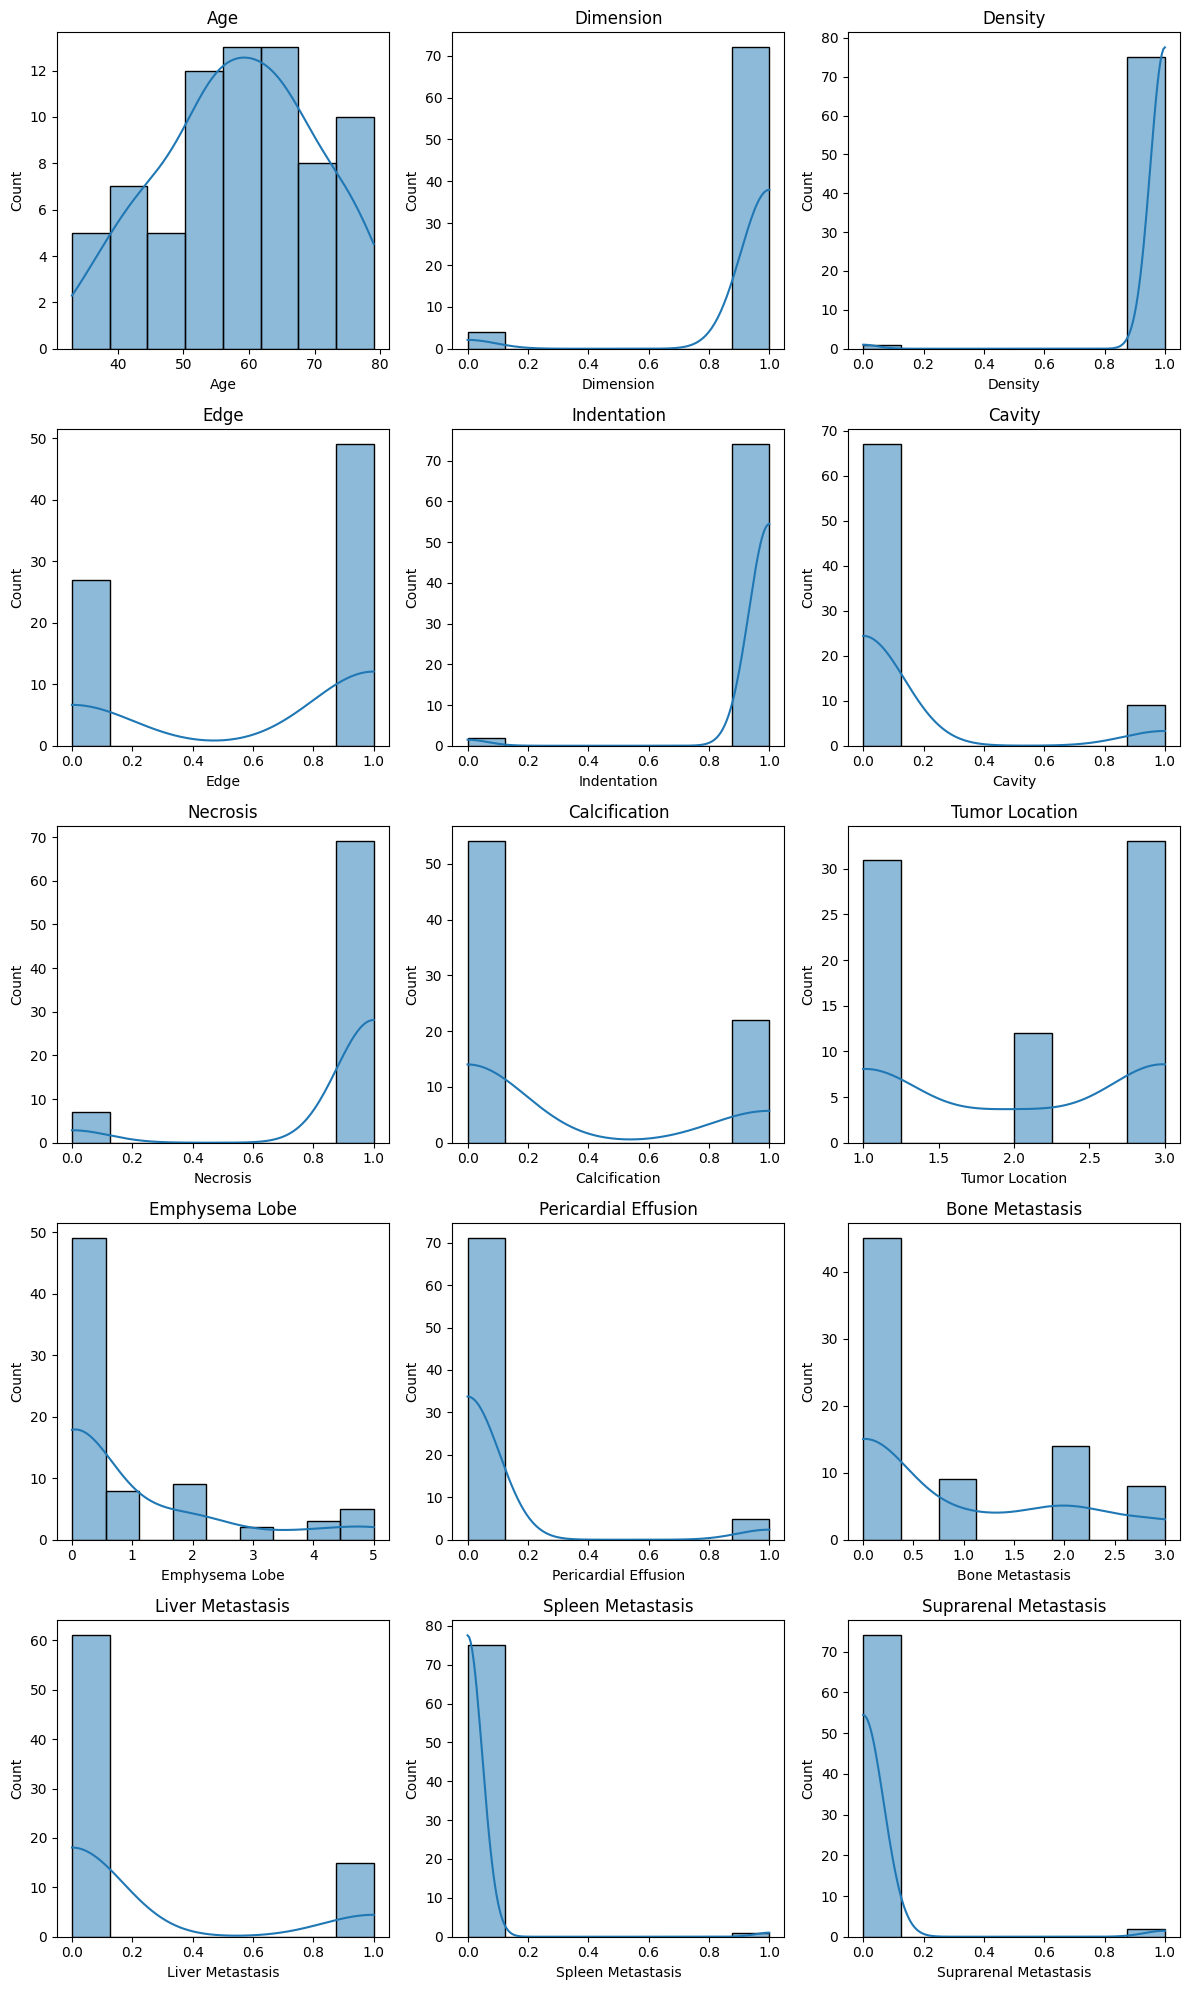

In [ ]:
plt.figure(figsize=(12, 20))
num_cols = len(numerical_data_raw.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data_raw.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data_raw[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

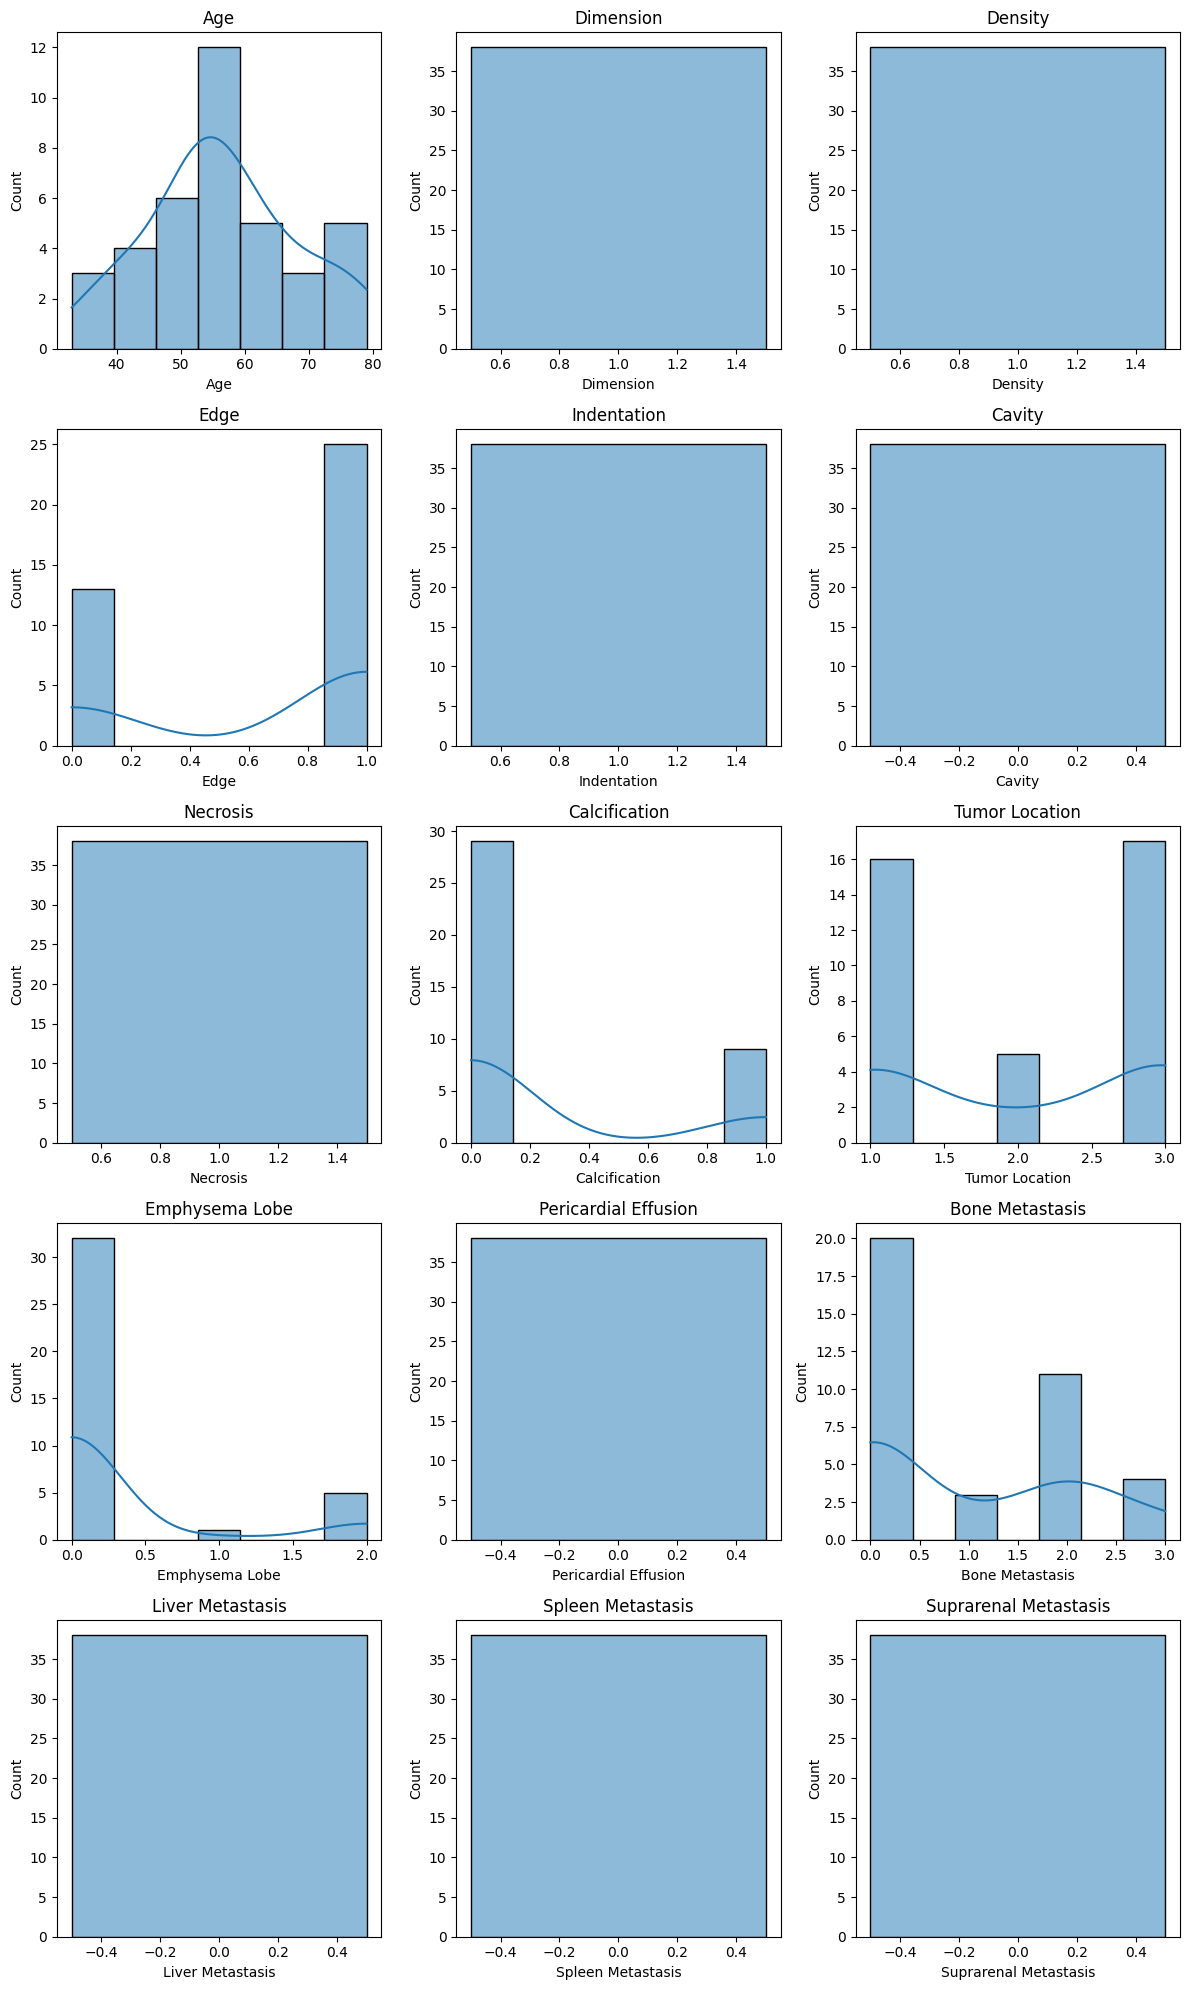

In [ ]:
plt.figure(figsize=(12, 20))
num_cols = len(numerical_data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

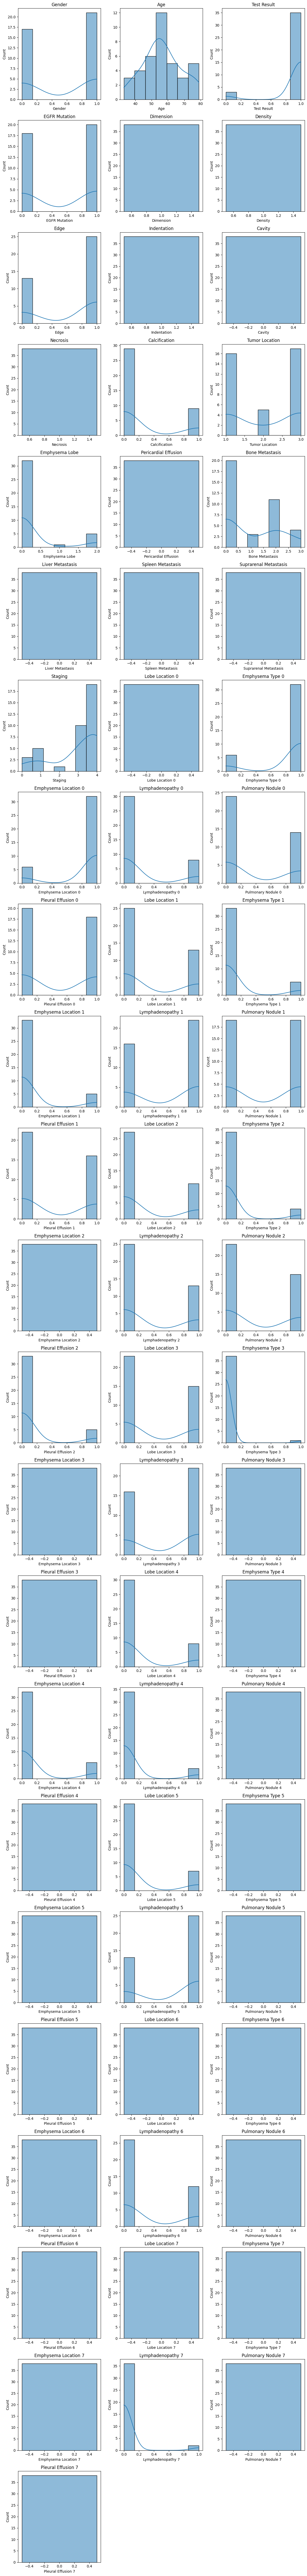

In [ ]:
plt.figure(figsize=(12, 100))
num_cols = len(numerical_data_fix.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data_fix.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data_fix[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### **Box Plot**

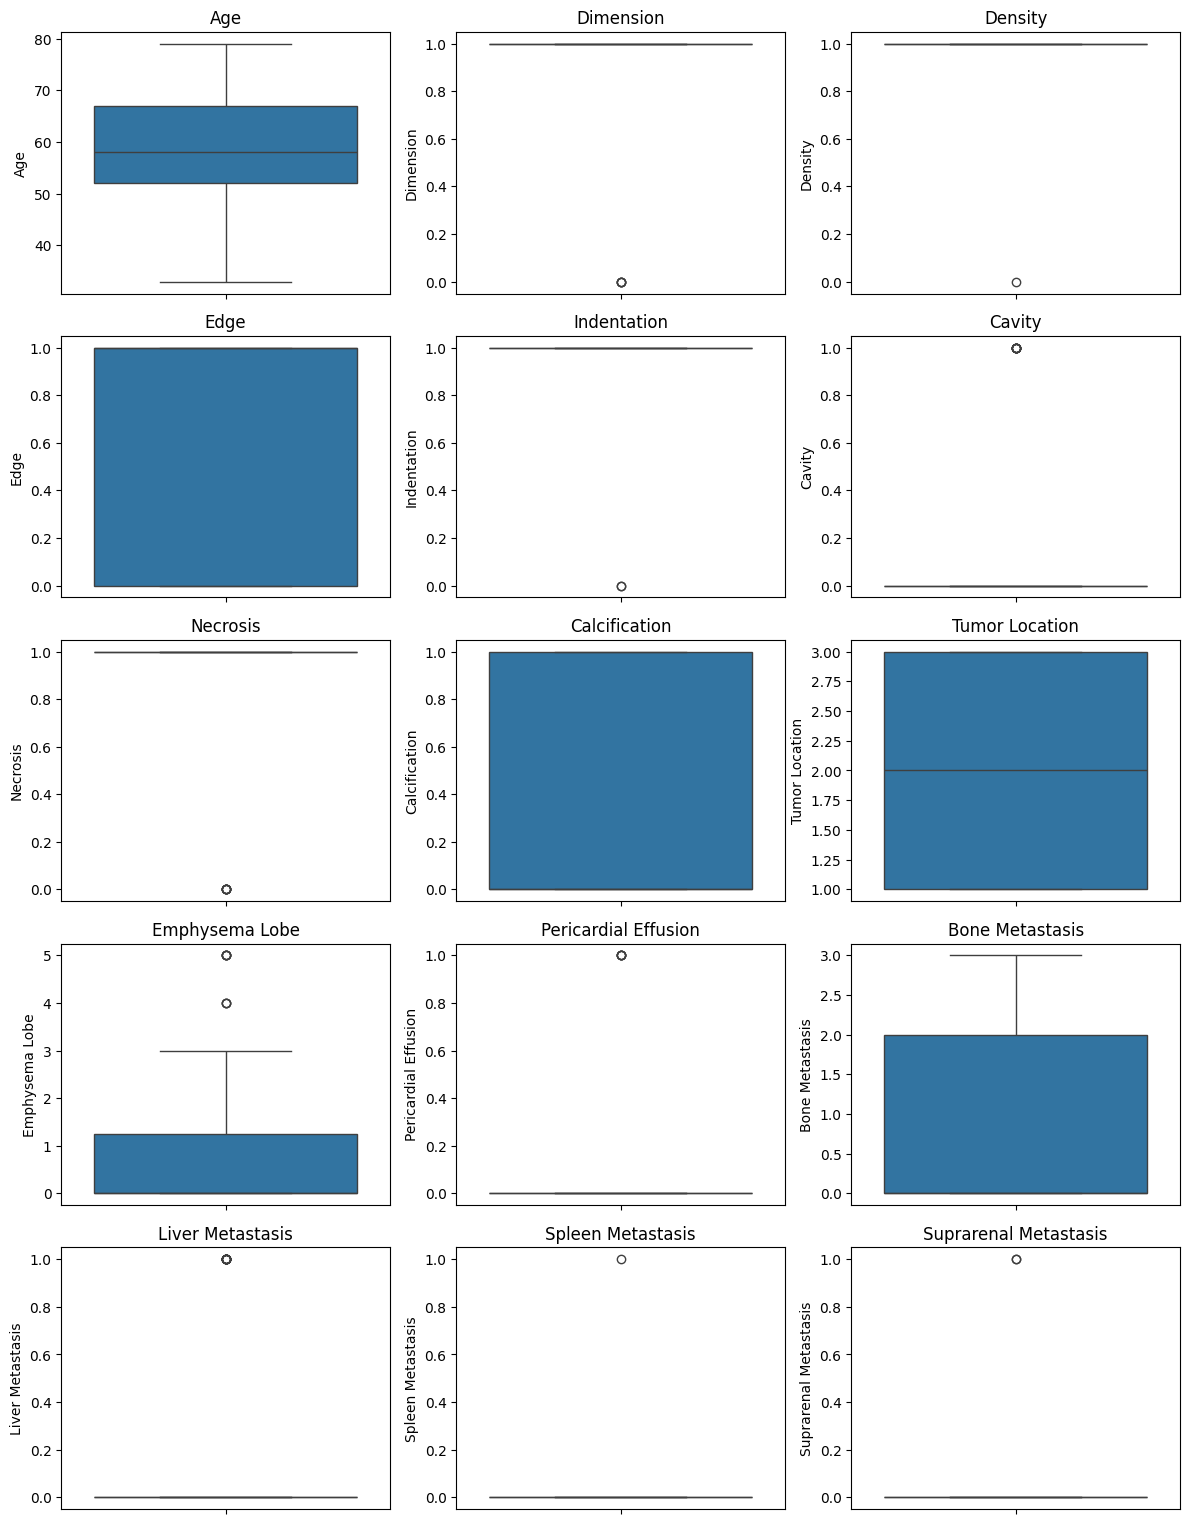

In [ ]:
plt.figure(figsize=(12, 70))
for i, col in enumerate(numerical_data_raw.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data_raw[col])
    plt.title(col)
plt.tight_layout()
plt.show()

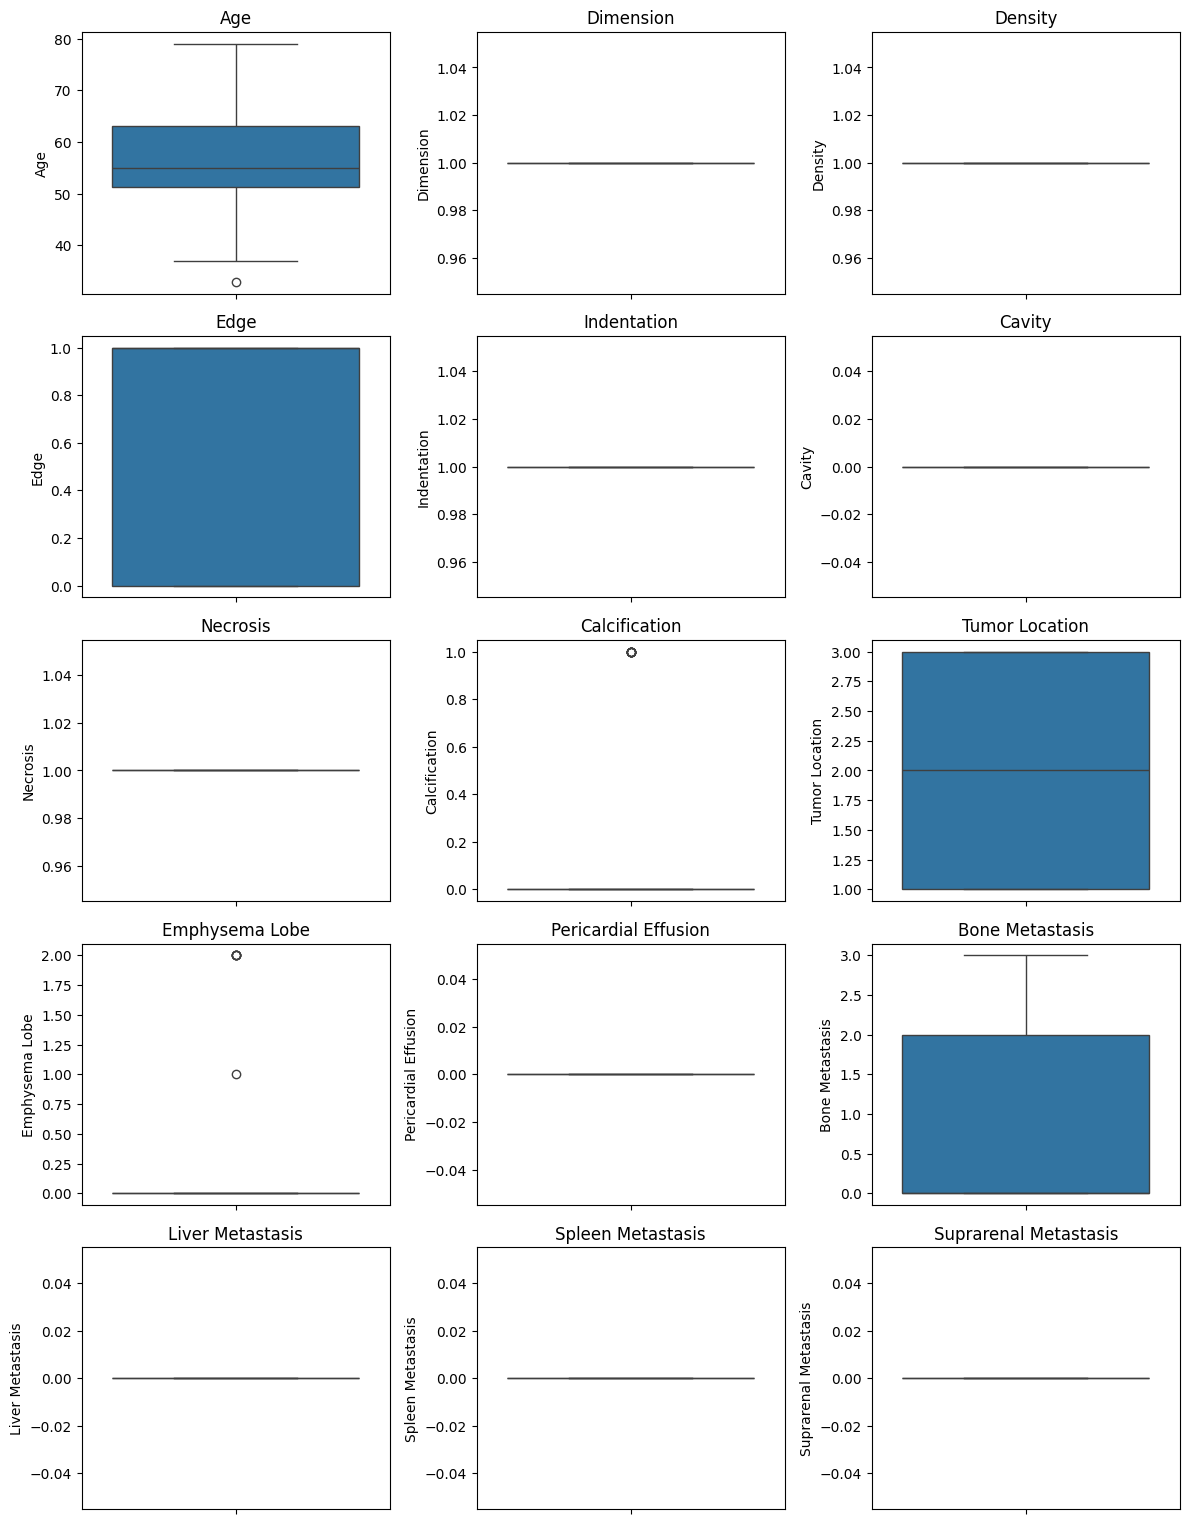

In [ ]:
plt.figure(figsize=(12, 70))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

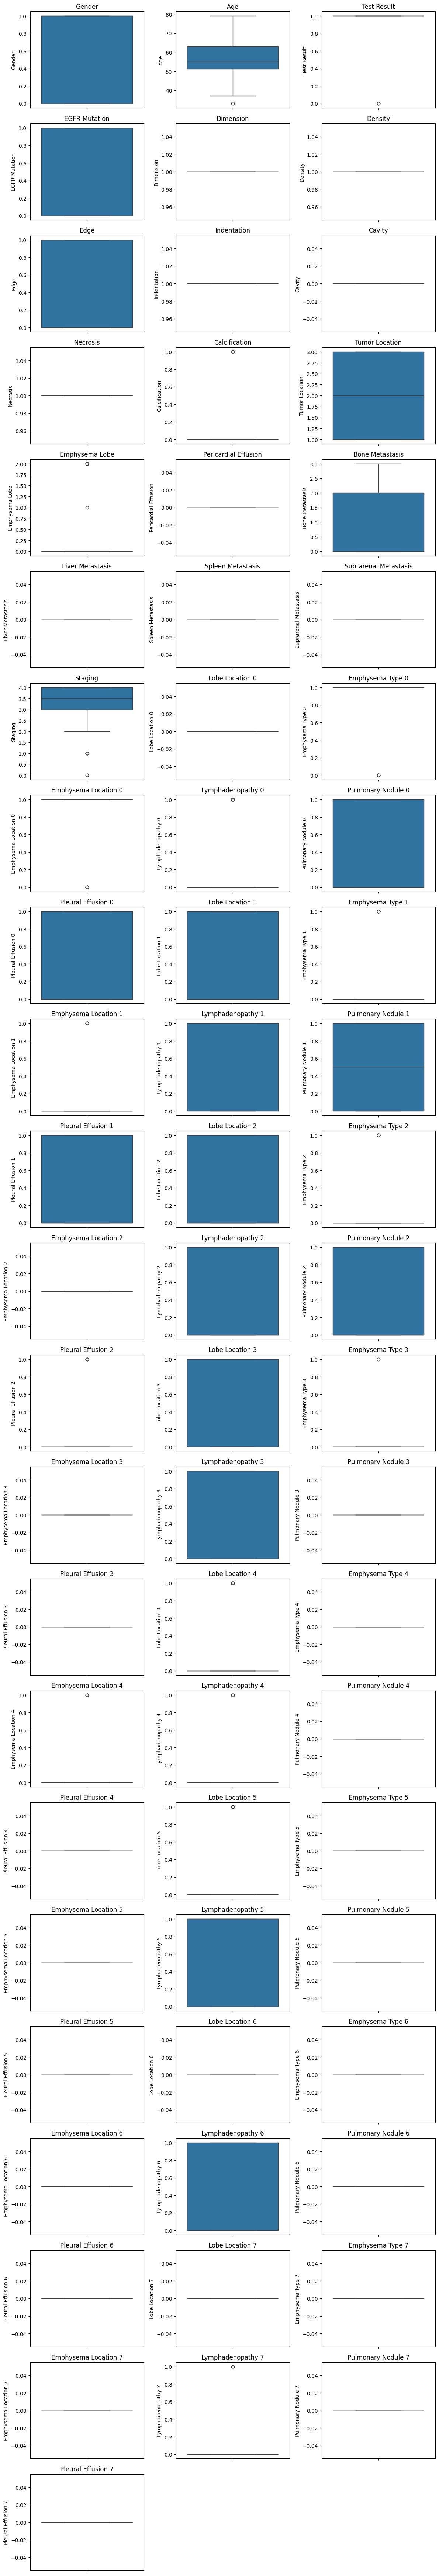

In [ ]:
plt.figure(figsize=(12, 70))
for i, col in enumerate(numerical_data_fix.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data_fix[col])
    plt.title(col)
plt.tight_layout()
plt.show()

The value of the data varies greatly.

### **Bar Chart**

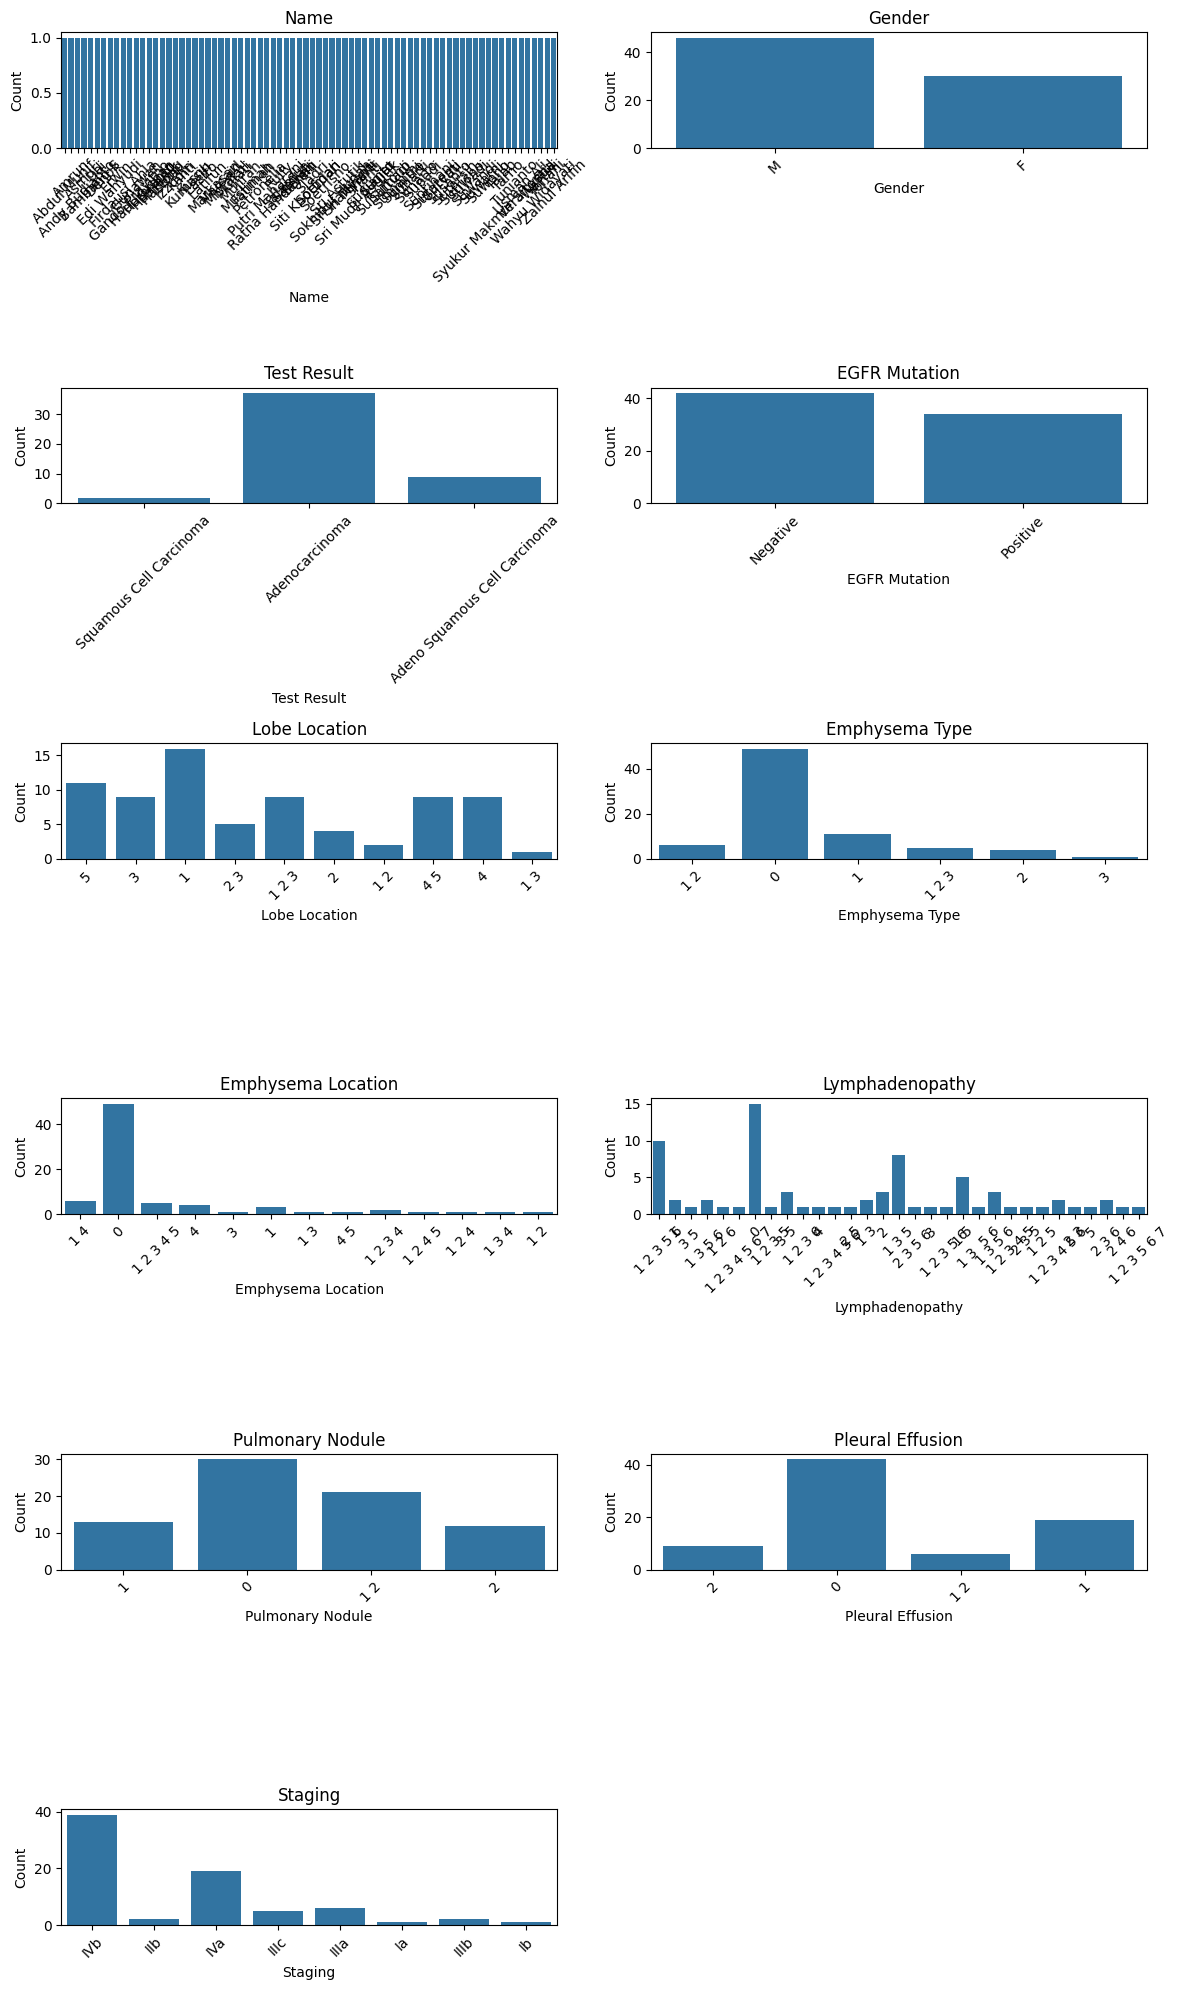

In [ ]:
plt.figure(figsize=(12, 20))
num_rows = (len(categorical_data_raw.columns) + 1) // 2
for i, col in enumerate(categorical_data_raw.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data_raw, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

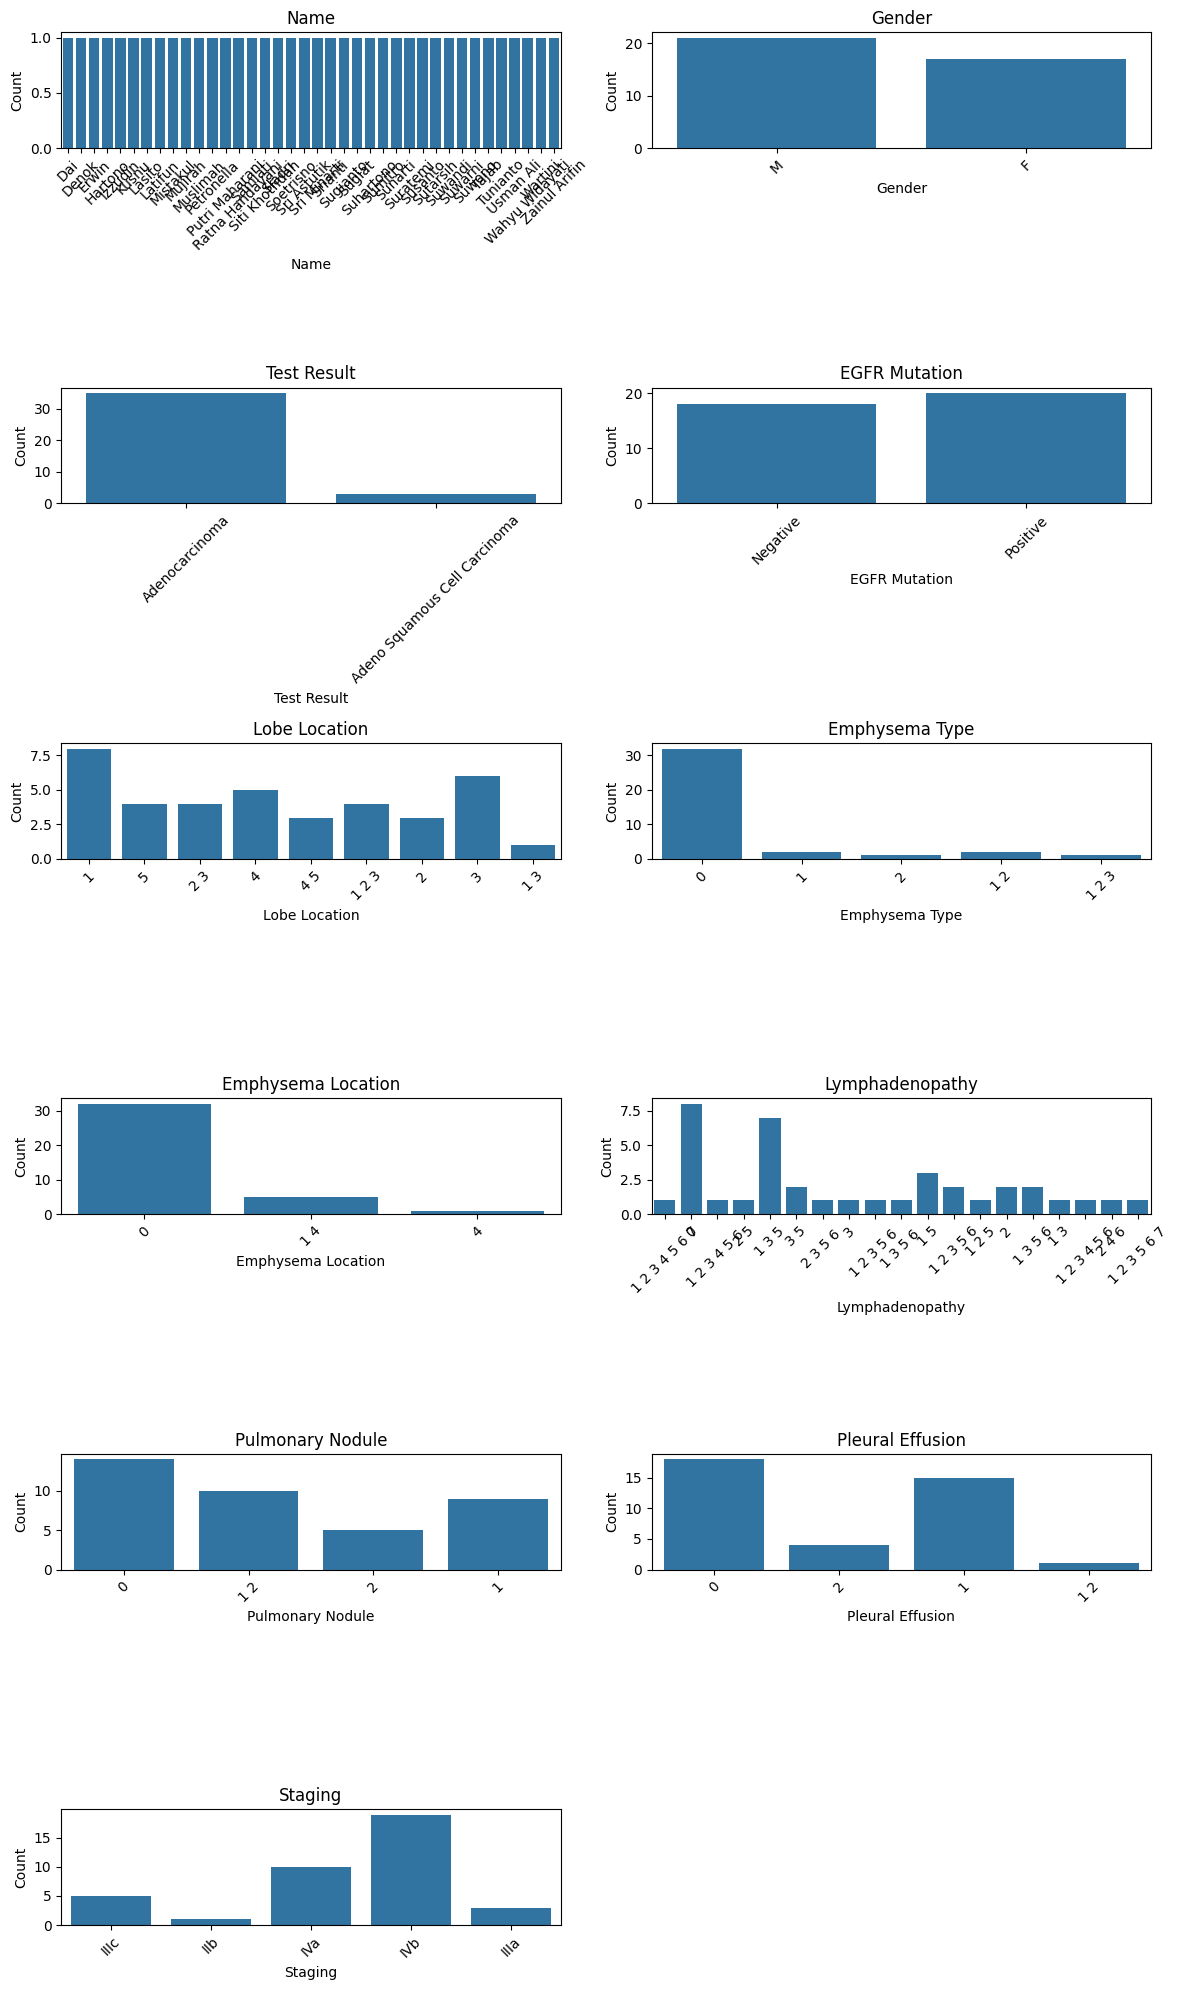

In [ ]:
plt.figure(figsize=(12, 20))
num_rows = (len(categorical_data.columns) + 1) // 2
for i, col in enumerate(categorical_data.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

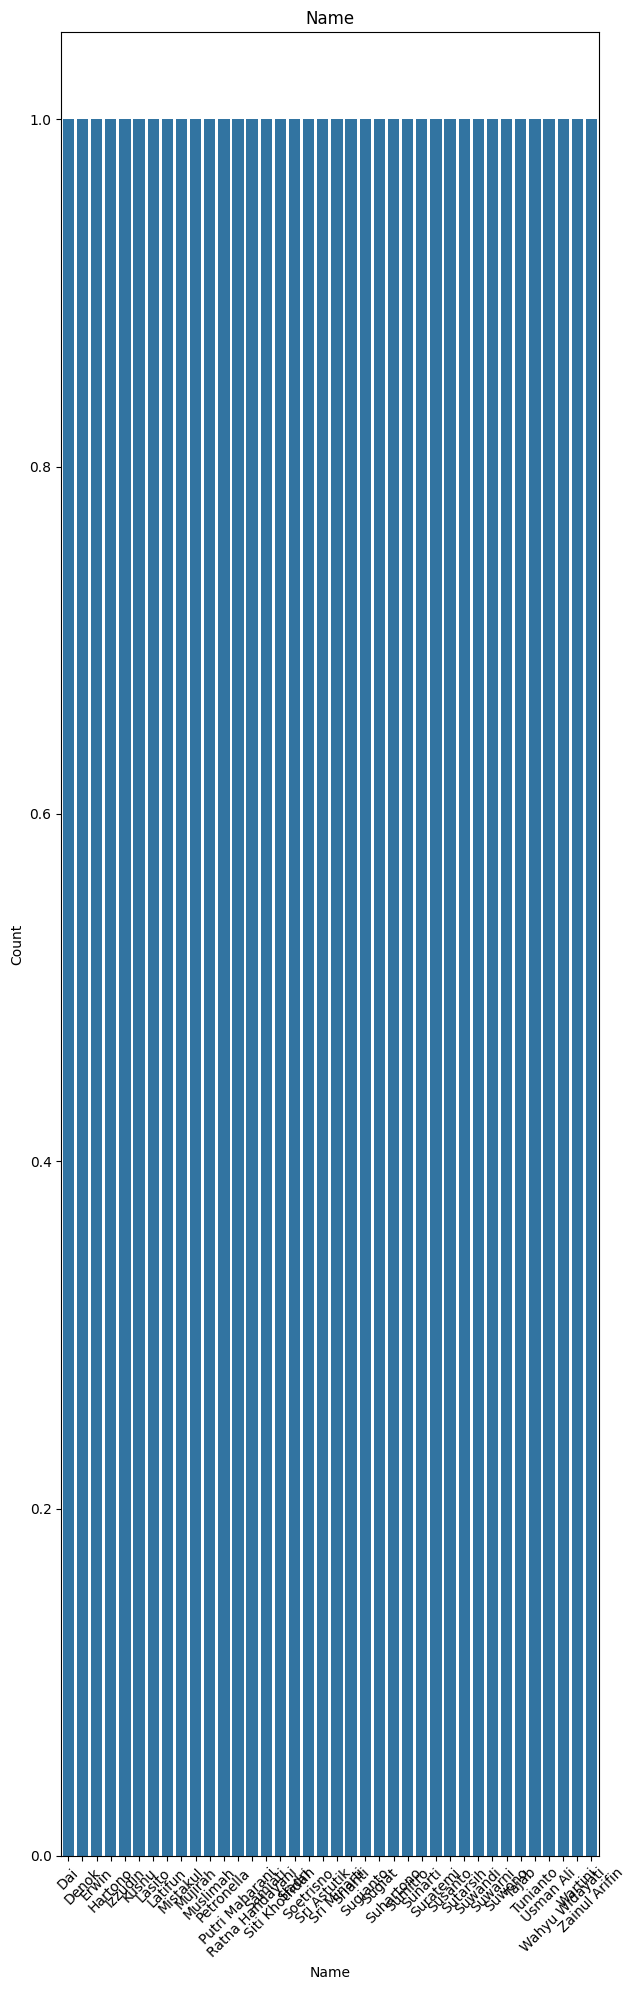

In [ ]:
plt.figure(figsize=(12, 20))
num_rows = (len(categorical_data_fix.columns) + 1) // 2
for i, col in enumerate(categorical_data_fix.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data_fix, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

- More men than women
- The most common test result is Adenocarcinoma
- More patients with EGFR mutation negative
- The most common lobe location in patients is the right superior lobe
- Emphysema Type, Emphysema Location, Lymphadenopathy, Pulmonary Nodule, Pleural Effusion have the most values of 0 or negative (not affected by these conditions)
- IVb is the most common staging for patients

### **Correlation**

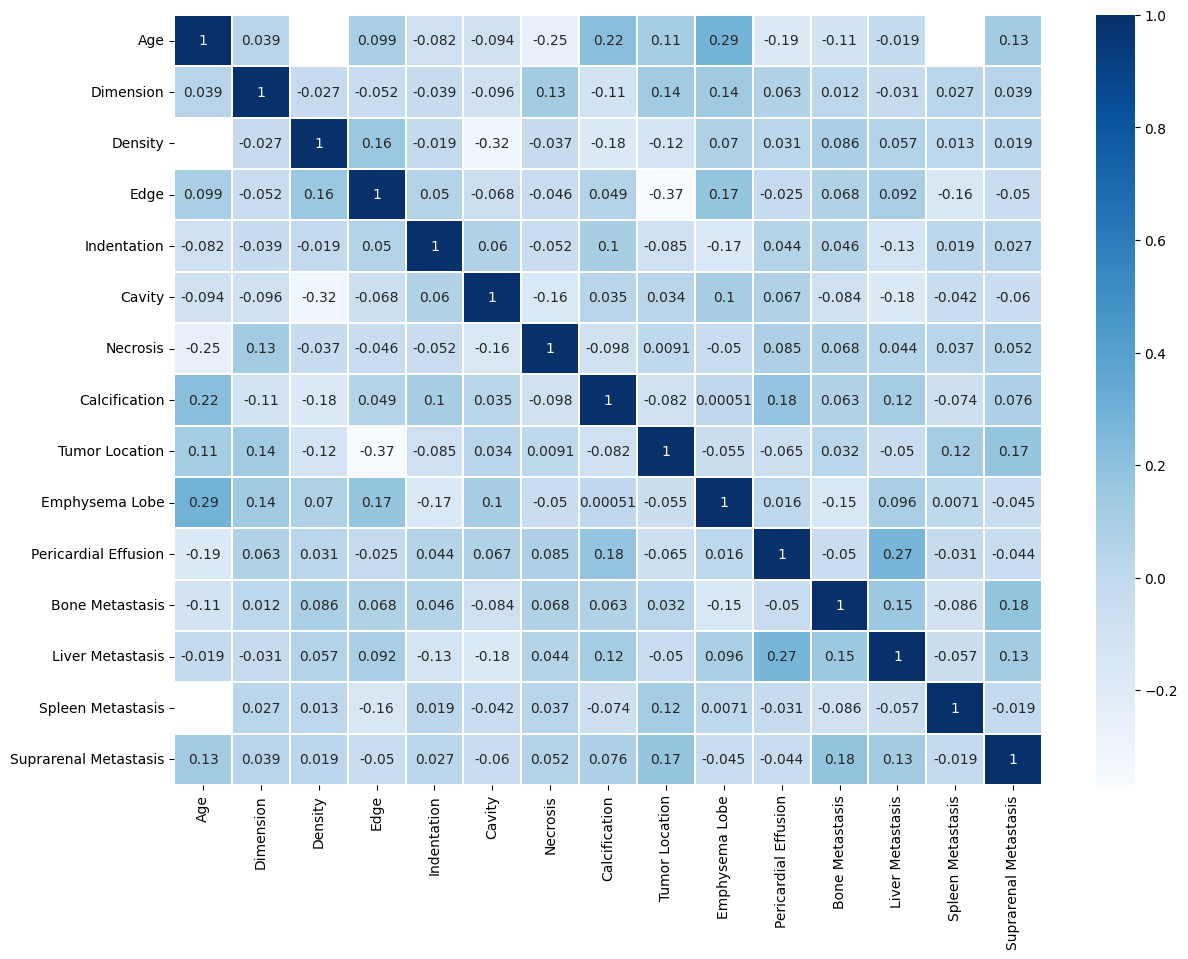

In [ ]:
sns.heatmap(numerical_data_raw.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

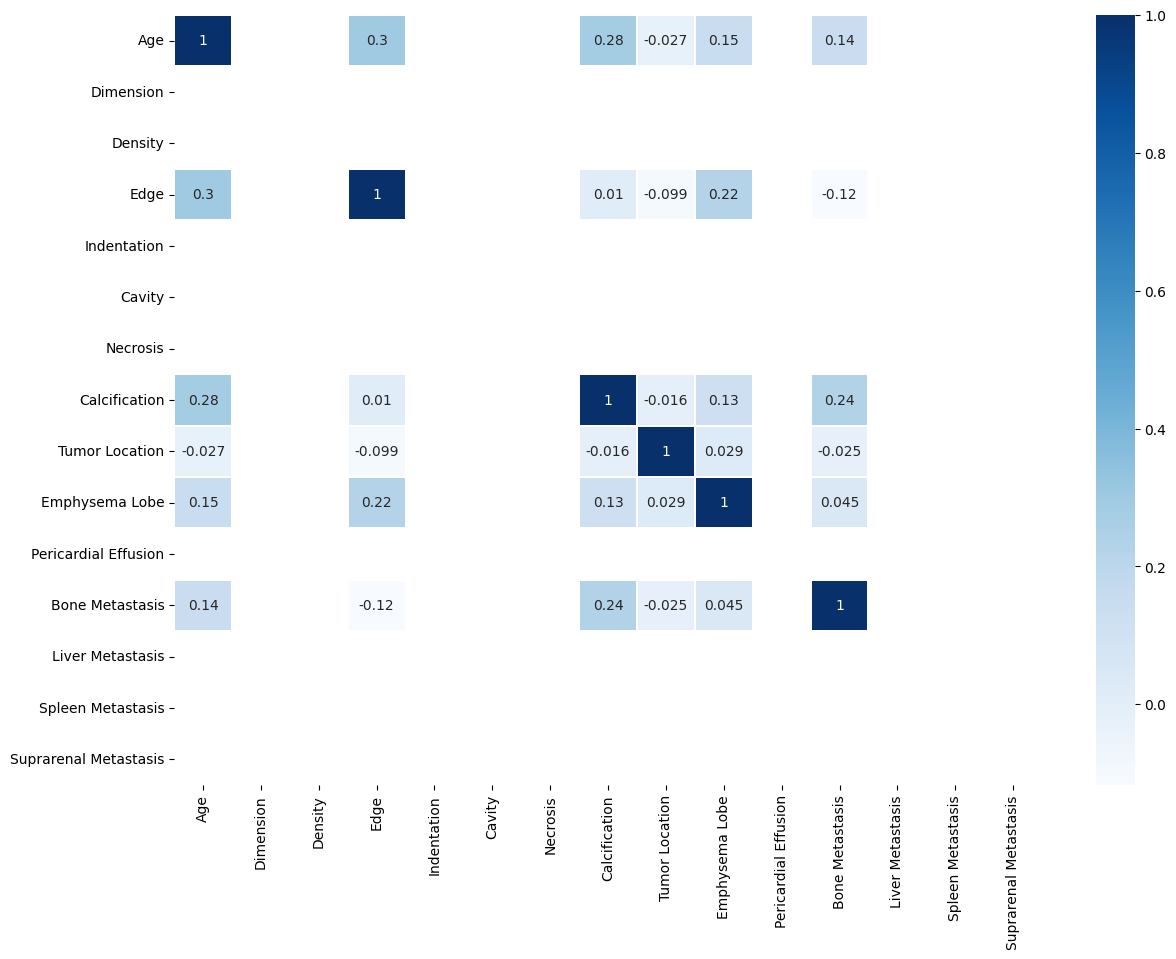

In [ ]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

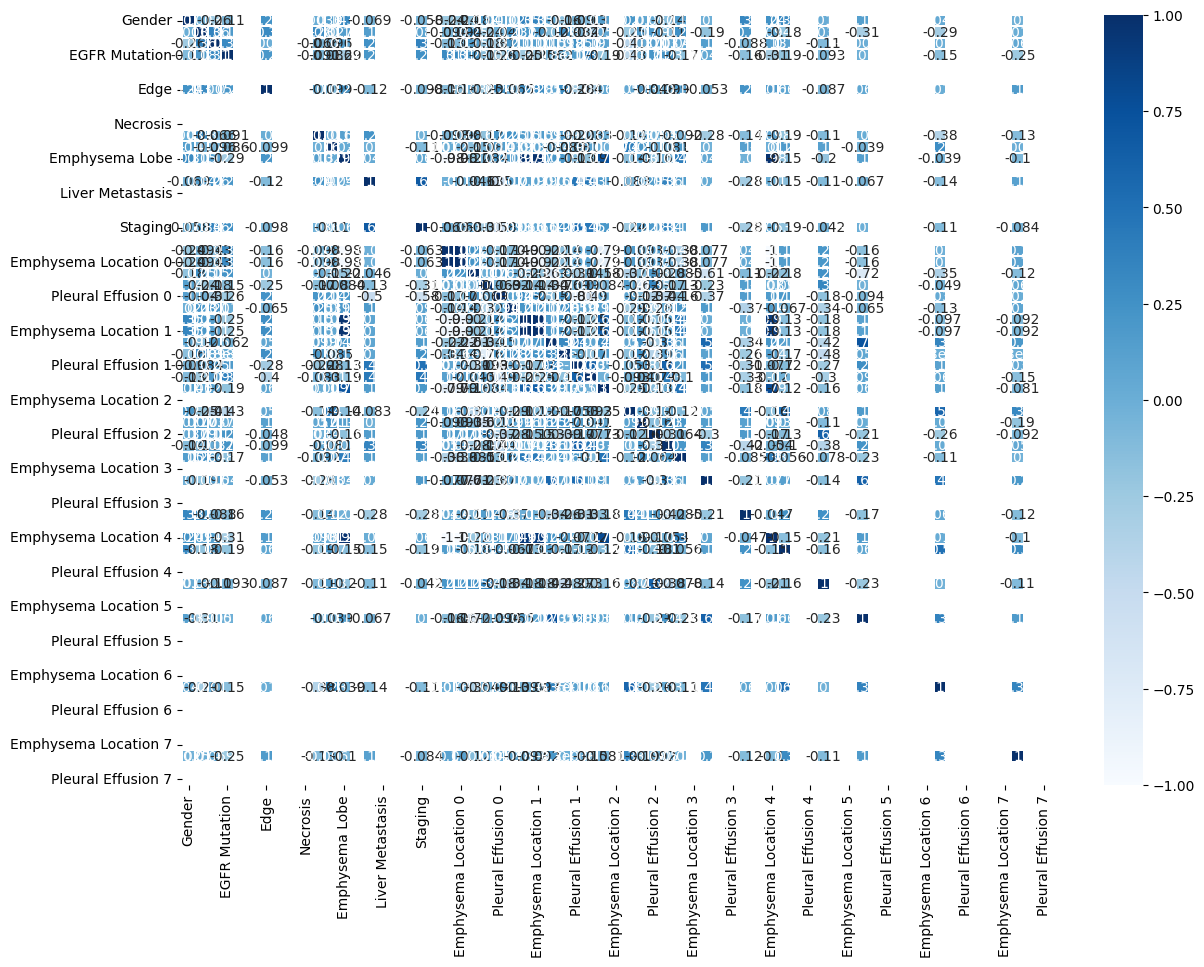

In [ ]:
sns.heatmap(num_data.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

## **Modeling (Classification)**

### **Modeling and Evaluation Function**

In [ ]:
def clf_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    table_report = classification_report(y_test, y_pred)
    print(table_report)
    accuracy = report['accuracy']
    f1_score_value = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    return accuracy, f1_score_value, precision, recall

def cnf_matrix_plot(y_test, y_pred):
  cnf_matrix = confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()

def roc_auc_plot(X_test, y_test, model):
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  return roc_auc

F1 Score, Precision, Recall used is weighted average.

In [ ]:
models = pd.DataFrame(columns=['Model', 'Duration', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC'])

### **SVM**

In [ ]:
start = time.time()
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7500000000000001
Precision: 0.75
Recall: 0.75
Duration: 0.0071468353271484375


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(svm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.167) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

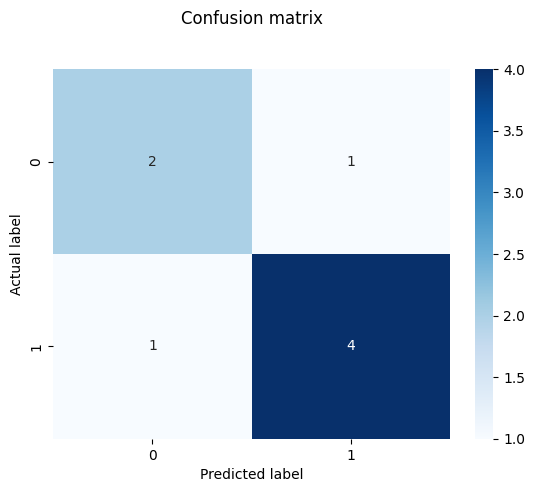

In [ ]:
cnf_matrix_plot(y_test, y_pred)

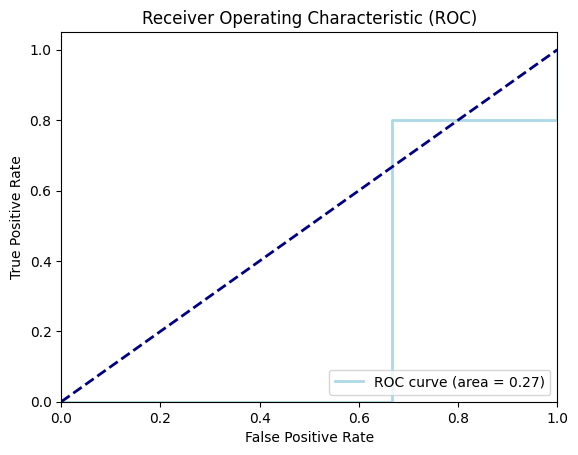

ROC AUC: 0.2666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, svm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "SVM", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **SVM (Tuning)**

In [ ]:
# svm = SVC()

# param_grid = {
#     'C': [0.1, 1, 10, 100, 0],
#     'gamma': [1, 0.1, 0.01, 0.001, 0],
#     'kernel': ['linear', 'rbf', 'poly']
# }

# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7500000000000001
Precision: 0.75
Recall: 0.75
Duration: 0.002908468246459961


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(svm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.167) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

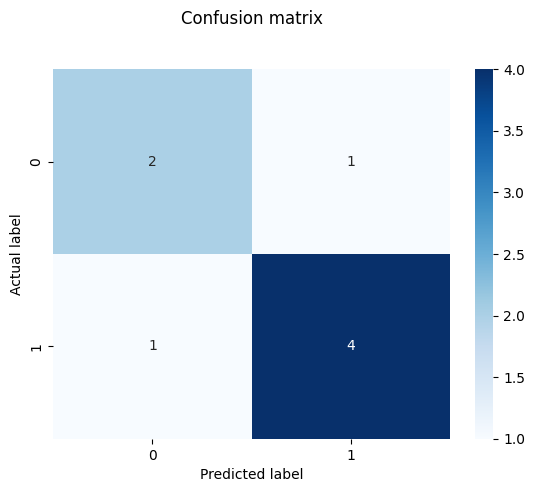

In [ ]:
cnf_matrix_plot(y_test, y_pred)

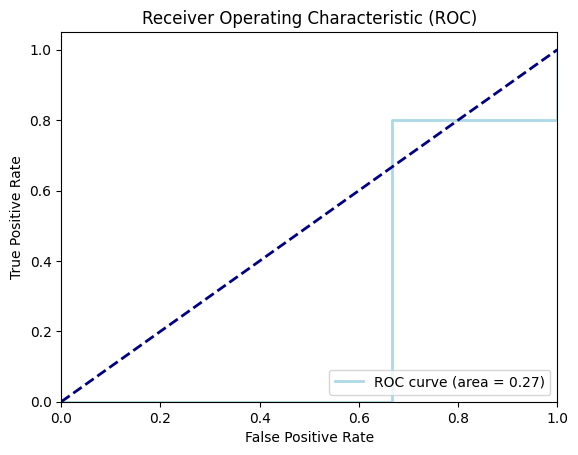

ROC AUC: 0.2666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, svm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "SVM (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **KNN**

In [ ]:
start = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

Accuracy: 0.625
F1-Score: 0.6309523809523809
Precision: 0.65625
Recall: 0.625
Duration: 0.004565238952636719


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(knn, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

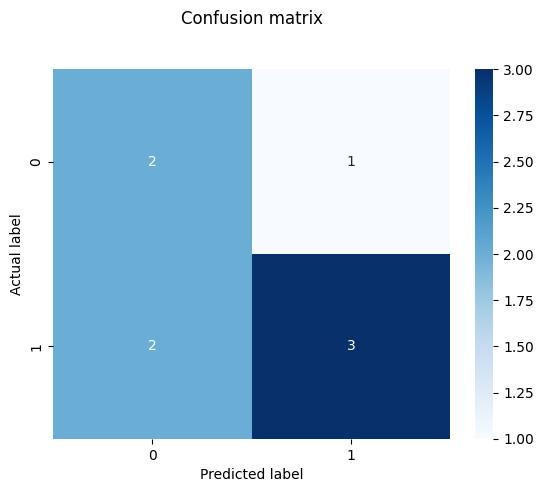

In [ ]:
cnf_matrix_plot(y_test, y_pred)

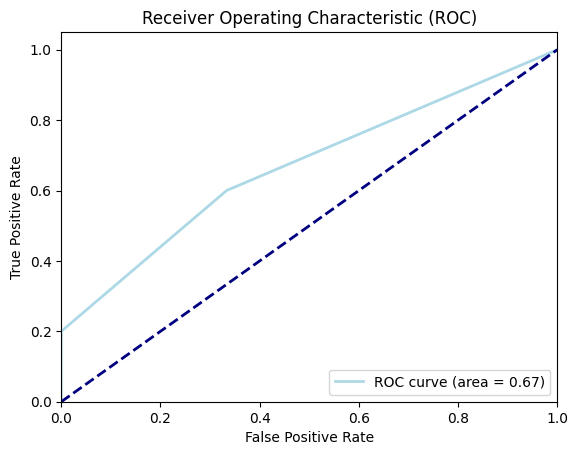

ROC AUC: 0.6666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, knn)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "KNN", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **KNN (Tuning)**

In [ ]:
# knn = KNeighborsClassifier()

# param_grid = {
#     'n_neighbors': [2, 3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
# }

# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=2, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

Accuracy: 0.875
F1-Score: 0.8681818181818182
Precision: 0.8958333333333334
Recall: 0.875
Duration: 0.00406956672668457


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(knn, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.833) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

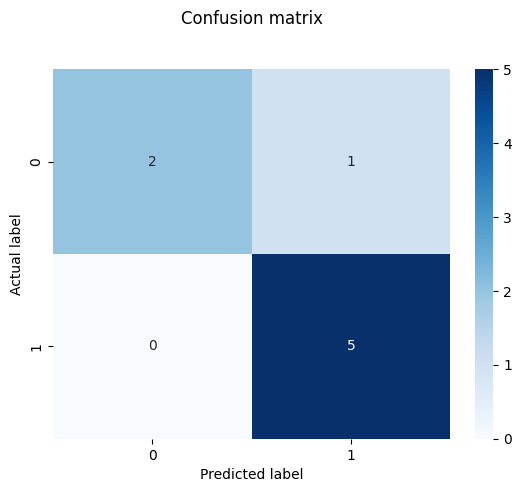

In [ ]:
cnf_matrix_plot(y_test, y_pred)

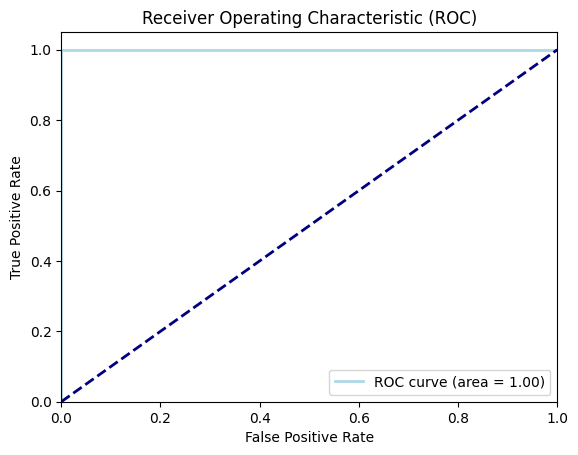

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, knn)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "KNN (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Naive Bayes**

In [ ]:
start = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

Accuracy: 0.875
F1-Score: 0.8681818181818182
Precision: 0.8958333333333334
Recall: 0.875
Duration: 0.005367755889892578


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(nb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.833) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

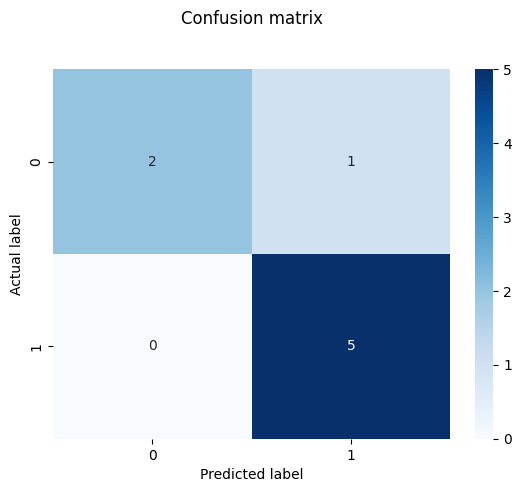

In [ ]:
cnf_matrix_plot(y_test, y_pred)

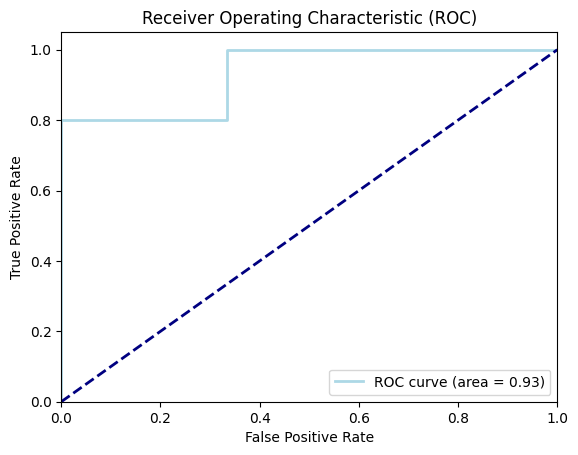

ROC AUC: 0.9333333333333333


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, nb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "Naive Bayes", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Naive Bayes (Tuning)**

In [ ]:
# nb = GaussianNB()

# param_grid = {
#     'var_smoothing': [1e-4, 1e-3, 1e-2]
# }

# grid_search = GridSearchCV(estimator=nb, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
nb = GaussianNB(var_smoothing=0.001)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

Accuracy: 0.875
F1-Score: 0.8681818181818182
Precision: 0.8958333333333334
Recall: 0.875
Duration: 0.006922721862792969


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(nb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.833) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

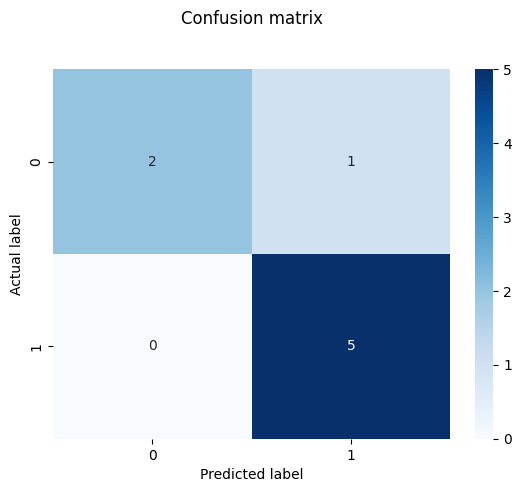

In [ ]:
cnf_matrix_plot(y_test, y_pred)

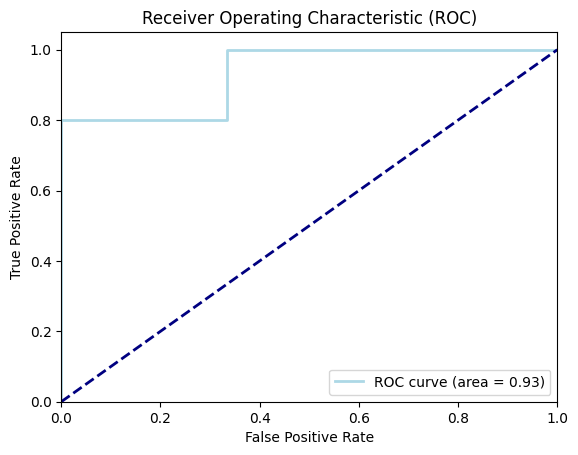

ROC AUC: 0.9333333333333333


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, nb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "Naive Bayes (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Decision Tree**

In [ ]:
start = time.time()
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7499999999999999
Precision: 0.85
Recall: 0.75
Duration: 0.007945060729980469


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

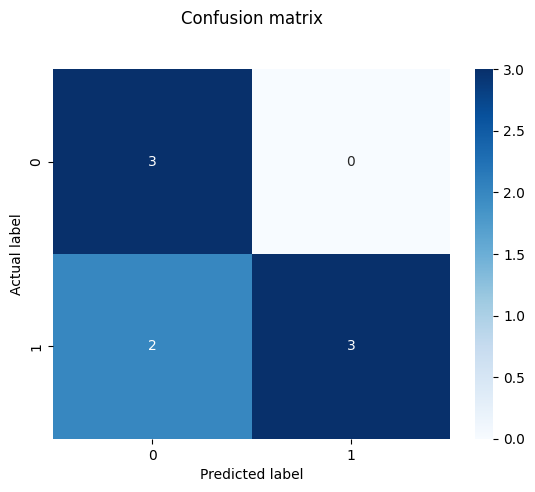

In [ ]:
cnf_matrix_plot(y_test, y_pred)

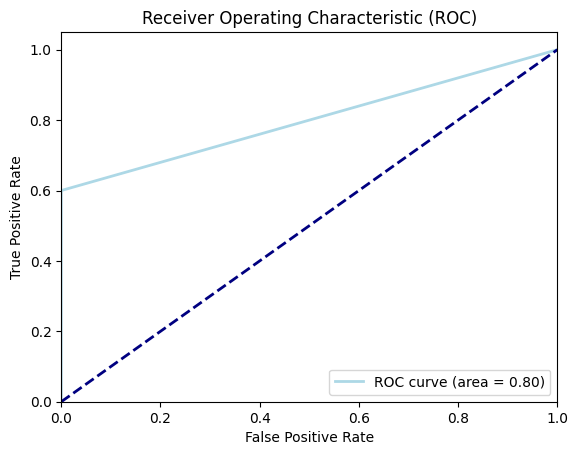

ROC AUC: 0.8


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, dec_tree)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "Decision Tree", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Decision Tree (Tuning)**

In [ ]:
# dt = DecisionTreeClassifier()

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Accuracy: 0.875
F1-Score: 0.876984126984127
Precision: 0.90625
Recall: 0.875
Duration: 0.003724336624145508


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ..................

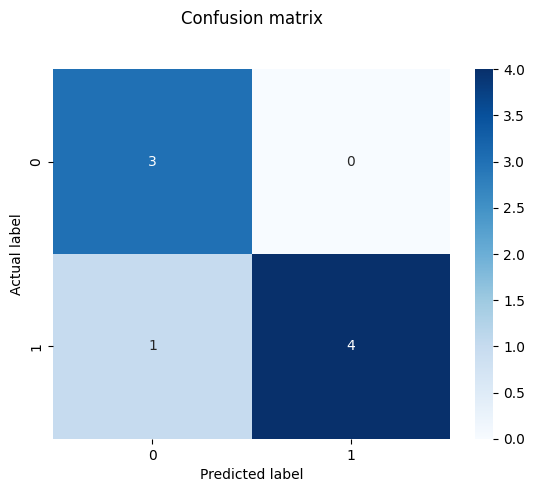

In [ ]:
cnf_matrix_plot(y_test, y_pred)

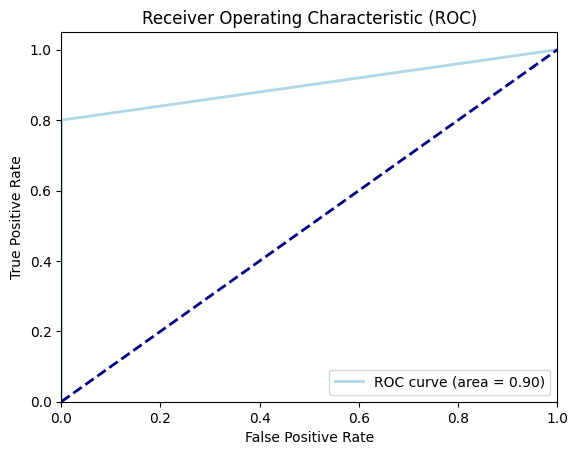

ROC AUC: 0.9


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, dec_tree)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "Decision Tree (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **AdaBoost**

In [ ]:
start = time.time()
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Duration: 0.25266551971435547


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(adaboost, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.4s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.833) total time=   0.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.5s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.7s
[CV] START .....................................................................
[CV] END ..................

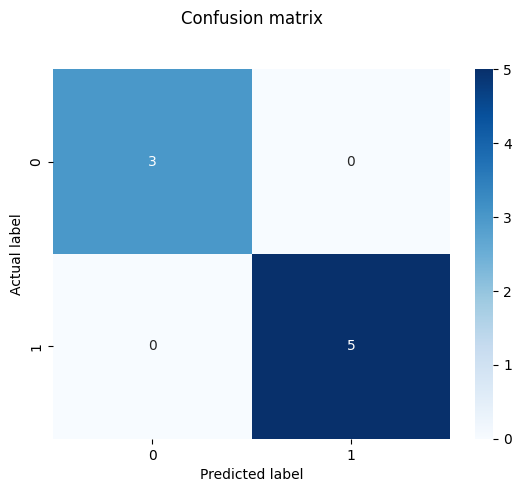

In [ ]:
cnf_matrix_plot(y_test, y_pred)

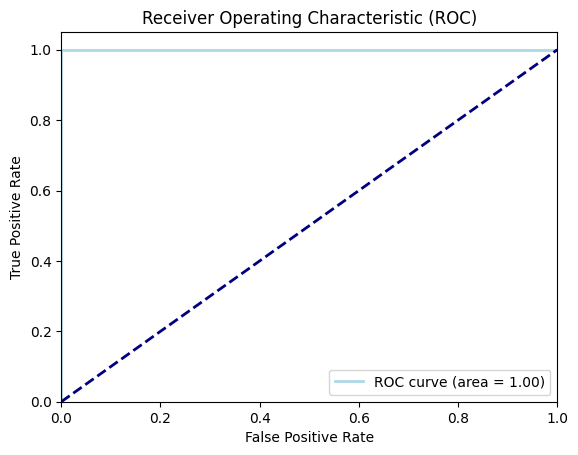

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, adaboost)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "AdaBoost", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **AdaBoost (Tuning)**

In [ ]:
# adaboost = AdaBoostClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0]
# }

# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
# adaboost = AdaBoostClassifier()

# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [0.1]
# }

# grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
adaboost = AdaBoostClassifier(learning_rate=0.2, n_estimators=100)
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Duration: 0.2372441291809082


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(adaboost, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.2s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.5s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.7s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.9s
[CV] START .....................................................................
[CV] END ..................

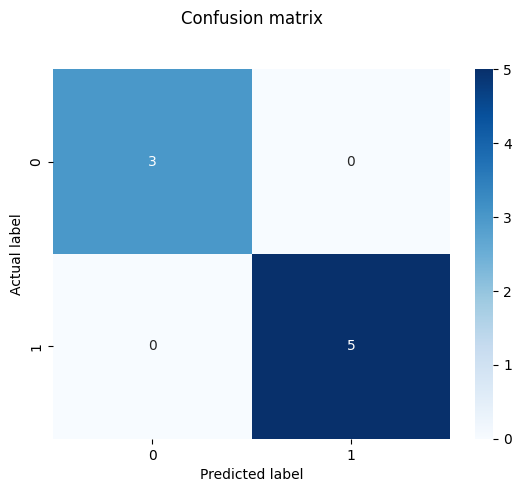

In [ ]:
cnf_matrix_plot(y_test, y_pred)

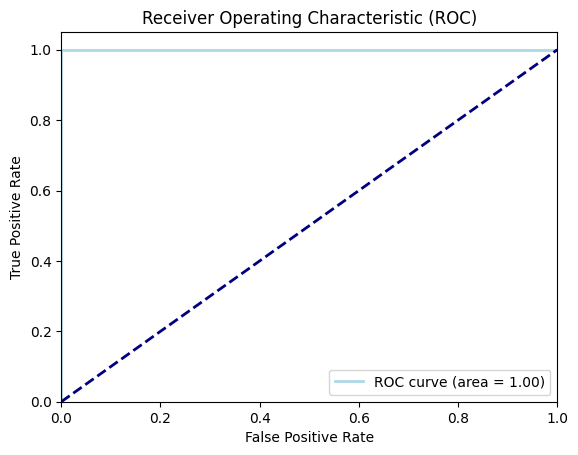

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, adaboost)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "AdaBoost (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Gradient Boosting (GBM)**

In [ ]:
start = time.time()
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Accuracy: 0.875
F1-Score: 0.876984126984127
Precision: 0.90625
Recall: 0.875
Duration: 0.10376119613647461


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(gbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.4s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.4s
[CV] START .....................................................................
[CV] END ..................

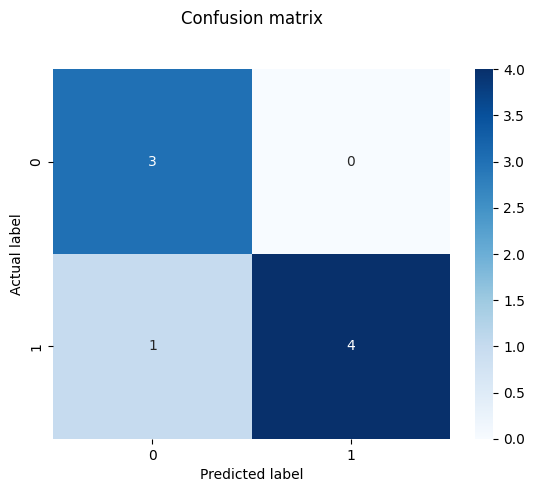

In [ ]:
cnf_matrix_plot(y_test, y_pred)

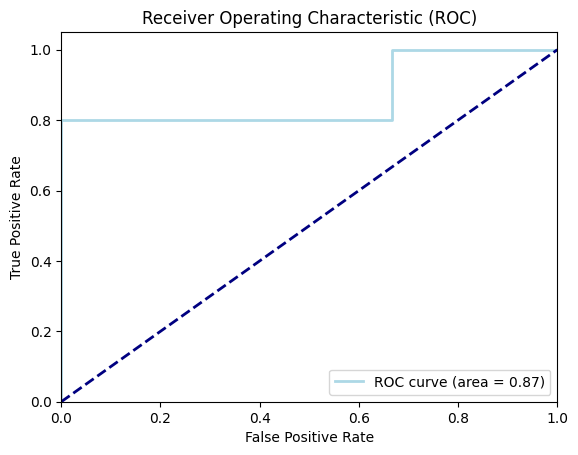

ROC AUC: 0.8666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, gbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "GBM", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **GBM (Tuning)**

In [ ]:
# gbm = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.5, 0.8, 1.0]
# }

# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
# gbm = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [0.01],
#     'max_depth': [3, 5],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1, 4],
#     'subsample': [0.5, 1.0]
# }

# grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid)
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
gbm = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Duration: 1.0057661533355713


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(gbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   1.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.9s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.8s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    2.6s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.8s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    3.5s
[CV] START .....................................................................
[CV] END ..................

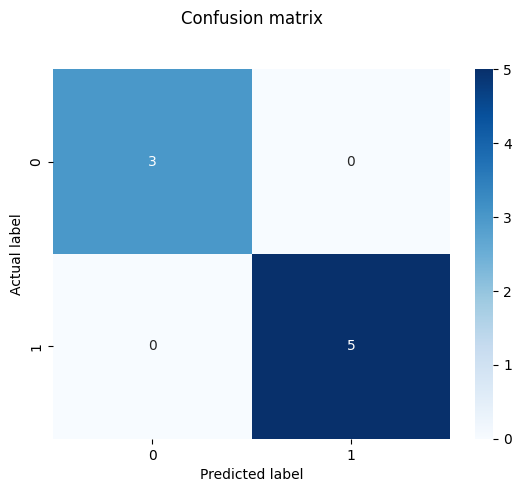

In [ ]:
cnf_matrix_plot(y_test, y_pred)

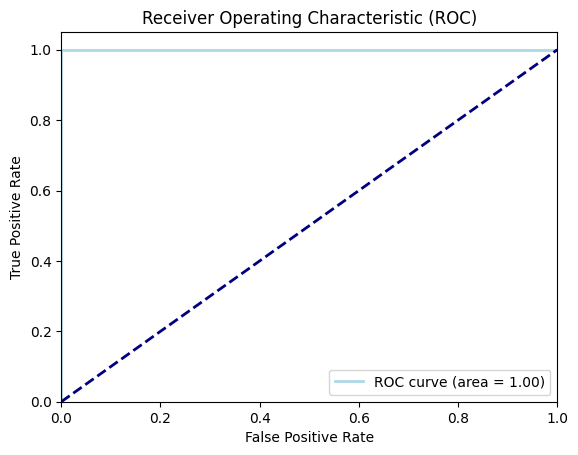

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, gbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "GBM (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Extreme Gradient Boosting (XGBoost)**


In [ ]:
start = time.time()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.75      0.60      0.67         5

    accuracy                           0.62         8
   macro avg       0.62      0.63      0.62         8
weighted avg       0.66      0.62      0.63         8

Accuracy: 0.625
F1-Score: 0.6309523809523809
Precision: 0.65625
Recall: 0.625
Duration: 0.02834153175354004


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.1s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ..................

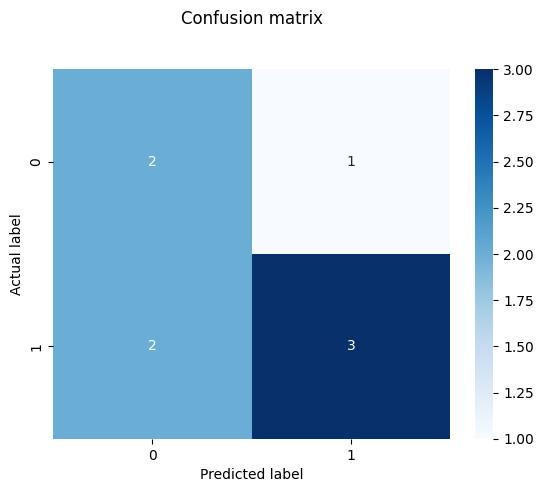

In [ ]:
cnf_matrix_plot(y_test, y_pred)

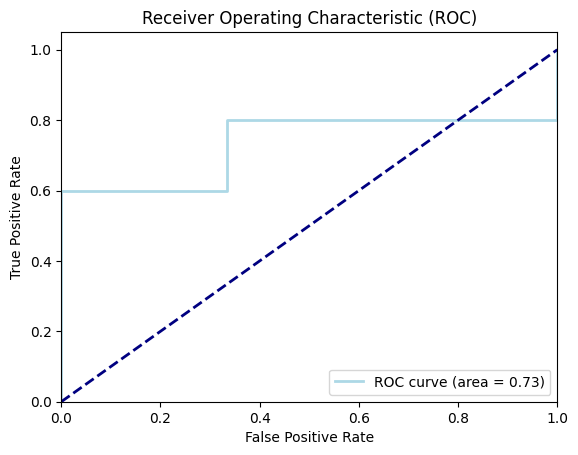

ROC AUC: 0.7333333333333334


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, xgb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "XGBoost", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **XGBoost (Tuning)**

In [ ]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0]
#     # 'max_depth': [3, 5, 7],
#     # 'min_child_weight': [1, 3, 5],
#     # 'subsample': [0.5, 0.8, 1.0],
#     # 'colsample_bytree': [0.5, 0.8, 1.0],
#     # 'gamma': [0, 0.1, 0.3]
# }

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
# xgb = XGBClassifier()

# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [0.01],
#     'max_depth': [3],
#     'min_child_weight': [4]
# }

# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7500000000000001
Precision: 0.75
Recall: 0.75
Duration: 0.3503856658935547


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.667) total time=   0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.1s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.833) total time=   0.2s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.4s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.333) total time=   0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.5s
[CV] START .....................................................................
[CV] END ..................

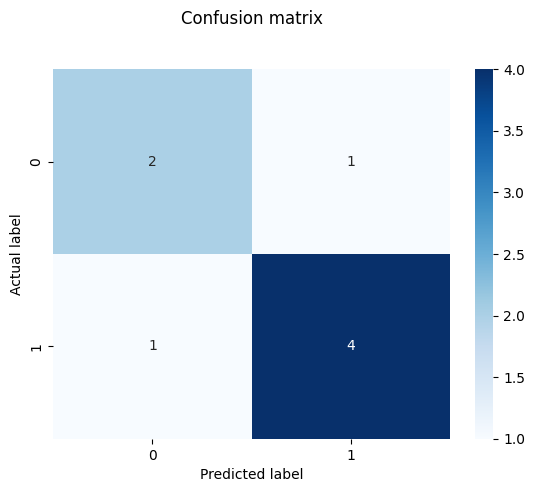

In [ ]:
cnf_matrix_plot(y_test, y_pred)

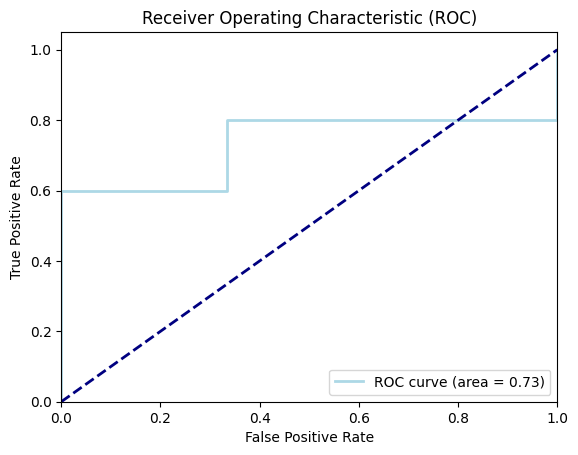

ROC AUC: 0.7333333333333334


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, xgb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "XGBoost (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Light Gradient Boosting (LGBM)**

In [ ]:
start = time.time()
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 15, number of negative: 15
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirement

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] 

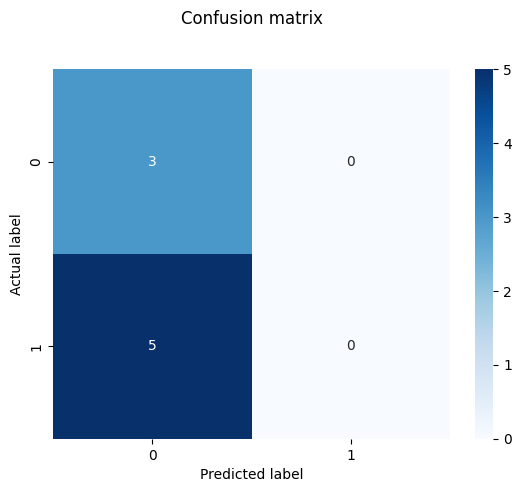

In [ ]:
cnf_matrix_plot(y_test, y_pred)

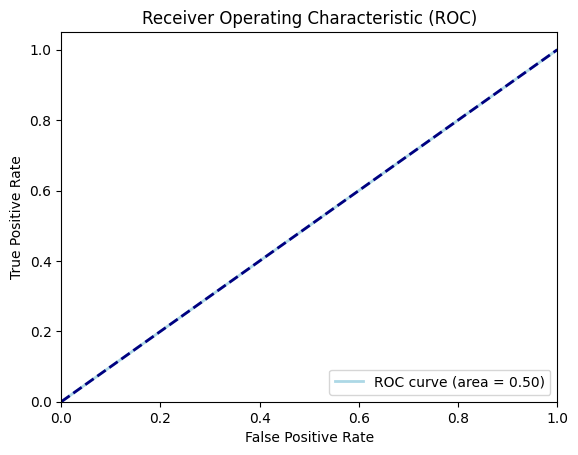

ROC AUC: 0.5


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, lgbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "LGBM", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **LGBM (Tuning)**

In [ ]:
# lgbm = LGBMClassifier()

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0],
#     'max_depth': [3, 5, 7],
#     # 'subsample': [0.5, 0.8, 1.0],
#     # 'colsample_bytree': [0.5, 0.8, 1.0],
#     # 'reg_alpha': [0.0, 0.1, 0.5],
#     # 'reg_lambda': [0.0, 0.1, 0.5]
# }

# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
# lgbm = LGBMClassifier()

# param_grid = {
#     'n_estimators': [200],
#     'learning_rate': [0.01],
#     'max_depth': [3],
#     'subsample': [0.5],
#     'colsample_bytree': [0.5],
# }

# grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
lgbm = LGBMClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 15, number of negative: 15
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 30, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirement

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(lgbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] 

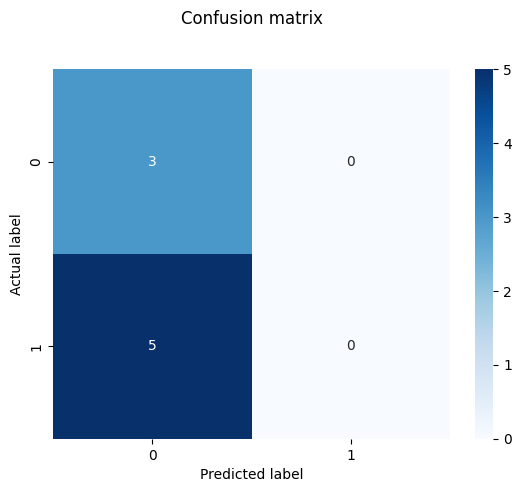

In [ ]:
cnf_matrix_plot(y_test, y_pred)

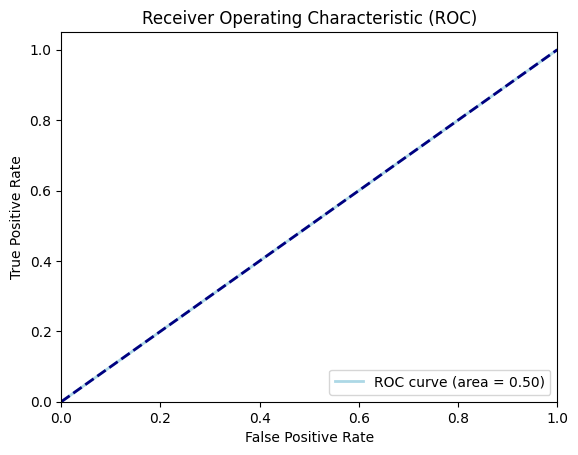

ROC AUC: 0.5


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, lgbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "LGBM (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **CatBoost**

In [ ]:
start = time.time()
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

Learning rate set to 0.002305
0:	learn: 0.6917492	total: 4.19ms	remaining: 4.18s
1:	learn: 0.6905711	total: 6.9ms	remaining: 3.44s
2:	learn: 0.6903023	total: 8ms	remaining: 2.66s
3:	learn: 0.6890242	total: 9.68ms	remaining: 2.41s
4:	learn: 0.6880823	total: 10.9ms	remaining: 2.18s
5:	learn: 0.6876727	total: 12.1ms	remaining: 2s
6:	learn: 0.6869935	total: 13.3ms	remaining: 1.88s
7:	learn: 0.6856307	total: 15.7ms	remaining: 1.94s
8:	learn: 0.6846220	total: 18ms	remaining: 1.98s
9:	learn: 0.6834509	total: 20.3ms	remaining: 2.01s
10:	learn: 0.6824337	total: 22.7ms	remaining: 2.04s
11:	learn: 0.6811108	total: 25.3ms	remaining: 2.08s
12:	learn: 0.6801604	total: 28.1ms	remaining: 2.13s
13:	learn: 0.6788998	total: 32.2ms	remaining: 2.27s
14:	learn: 0.6773970	total: 34.4ms	remaining: 2.26s
15:	learn: 0.6761575	total: 37.1ms	remaining: 2.28s
16:	learn: 0.6745540	total: 39.5ms	remaining: 2.28s
17:	learn: 0.6732455	total: 42ms	remaining: 2.29s
18:	learn: 0.6721060	total: 44.4ms	remaining: 2.29s
19:

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(catboost, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

Streaming output truncated to the last 5000 lines.
22:	learn: 0.6661577	total: 56.3ms	remaining: 2.39s
23:	learn: 0.6647300	total: 58.7ms	remaining: 2.39s
24:	learn: 0.6637164	total: 61.1ms	remaining: 2.38s
25:	learn: 0.6629116	total: 63.5ms	remaining: 2.38s
26:	learn: 0.6620739	total: 66.5ms	remaining: 2.4s
27:	learn: 0.6607997	total: 68.9ms	remaining: 2.39s
28:	learn: 0.6596324	total: 71.6ms	remaining: 2.4s
29:	learn: 0.6588465	total: 73.5ms	remaining: 2.38s
30:	learn: 0.6578468	total: 76.7ms	remaining: 2.4s
31:	learn: 0.6566676	total: 79.6ms	remaining: 2.41s
32:	learn: 0.6557152	total: 82.4ms	remaining: 2.41s
33:	learn: 0.6543569	total: 84.9ms	remaining: 2.41s
34:	learn: 0.6528711	total: 87.4ms	remaining: 2.41s
35:	learn: 0.6518005	total: 89.7ms	remaining: 2.4s
36:	learn: 0.6510343	total: 92.1ms	remaining: 2.4s
37:	learn: 0.6495713	total: 93.9ms	remaining: 2.38s
38:	learn: 0.6483579	total: 96.7ms	remaining: 2.38s
39:	learn: 0.6479383	total: 97.9ms	remaining: 2.35s
40:	learn: 0.64668

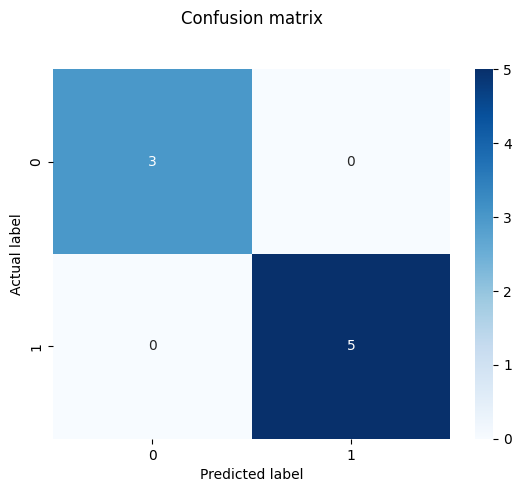

In [ ]:
cnf_matrix_plot(y_test, y_pred)

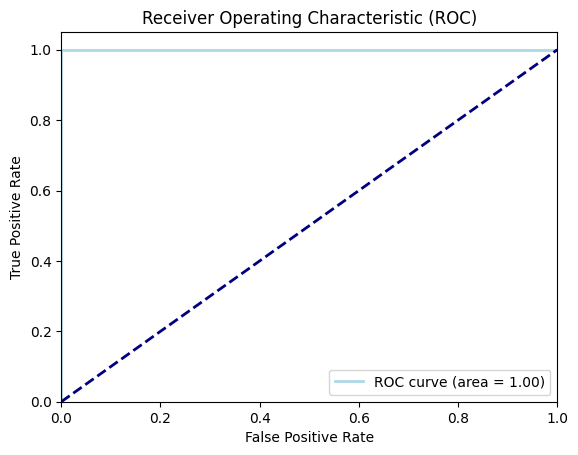

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, catboost)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "CatBoost", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **CatBoost (Tuning)**

In [ ]:
# catboost = CatBoostClassifier()

# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'depth': [4, 6, 8]
# }

# grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
catboost = CatBoostClassifier(depth=3, iterations=300, learning_rate=0.01)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

0:	learn: 0.6891224	total: 799us	remaining: 239ms
1:	learn: 0.6839758	total: 2.17ms	remaining: 324ms
2:	learn: 0.6816867	total: 3.15ms	remaining: 312ms
3:	learn: 0.6793804	total: 4.28ms	remaining: 317ms
4:	learn: 0.6778490	total: 5.41ms	remaining: 319ms
5:	learn: 0.6725831	total: 6.46ms	remaining: 316ms
6:	learn: 0.6689064	total: 7.37ms	remaining: 309ms
7:	learn: 0.6651723	total: 8.25ms	remaining: 301ms
8:	learn: 0.6636661	total: 9.17ms	remaining: 297ms
9:	learn: 0.6612806	total: 10ms	remaining: 291ms
10:	learn: 0.6585528	total: 10.9ms	remaining: 287ms
11:	learn: 0.6558761	total: 11.8ms	remaining: 284ms
12:	learn: 0.6532473	total: 12.6ms	remaining: 279ms
13:	learn: 0.6512223	total: 13.5ms	remaining: 275ms
14:	learn: 0.6503524	total: 14.3ms	remaining: 272ms
15:	learn: 0.6486746	total: 15.2ms	remaining: 269ms
16:	learn: 0.6462211	total: 16ms	remaining: 267ms
17:	learn: 0.6440821	total: 16.9ms	remaining: 265ms
18:	learn: 0.6430938	total: 17.7ms	remaining: 262ms
19:	learn: 0.6409215	total:

In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(catboost, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
0:	learn: 0.6894444	total: 1.23ms	remaining: 369ms
1:	learn: 0.6844373	total: 2.19ms	remaining: 326ms
2:	learn: 0.6824044	total: 2.83ms	remaining: 280ms
3:	learn: 0.6796908	total: 3.52ms	remaining: 261ms
4:	learn: 0.6745166	total: 4.2ms	remaining: 248ms
5:	learn: 0.6712810	total: 4.88ms	remaining: 239ms
6:	learn: 0.6688180	total: 5.9ms	remaining: 247ms
7:	learn: 0.6651115	total: 6.94ms	remaining: 253ms
8:	learn: 0.6595401	total: 8.04ms	remaining: 260ms
9:	learn: 0.6551085	total: 9.03ms	remaining: 262ms
10:	learn: 0.6512431	total: 10ms	remaining: 263ms
11:	learn: 0.6474653	total: 11.2ms	remaining: 268ms
12:	learn: 0.6456395	total: 12.3ms	remaining: 271ms
13:	learn: 0.6412415	total: 13ms	remaining: 266ms
14:	learn: 0.6343340	total: 13.9ms	remaining: 265ms
15:	learn: 0.6309923	total: 14.6ms	remaining: 259ms
16:	learn: 0.6286975	total: 15.5ms	remaining: 257ms
17:	learn: 0.6238530	total: 16.8ms	remaining: 263ms

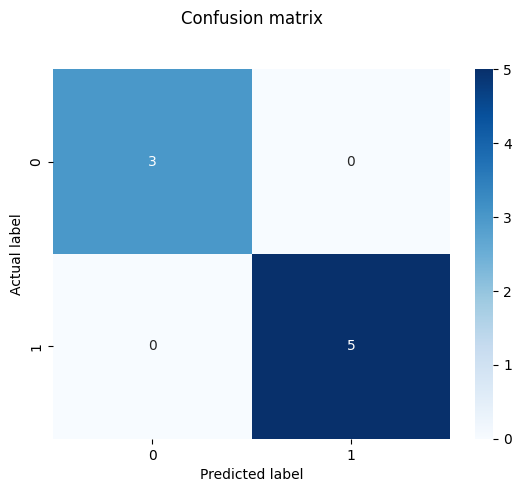

In [ ]:
cnf_matrix_plot(y_test, y_pred)

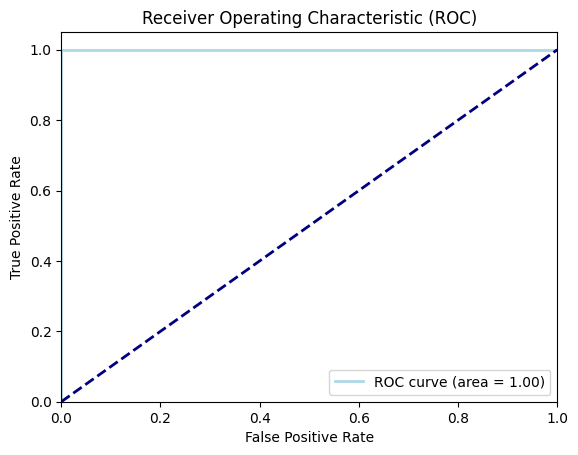

ROC AUC: 1.0


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, catboost)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "CatBoost (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Histogram-Based Gradient Boosting (HistGBM)**

In [ ]:
start = time.time()
hgbm = HistGradientBoostingClassifier()
hgbm.fit(X_train, y_train)
y_pred = hgbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8

Accuracy: 0.375
F1-Score: 0.20454545454545453
Precision: 0.140625
Recall: 0.375
Duration: 0.019797086715698242


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(hgbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ..................

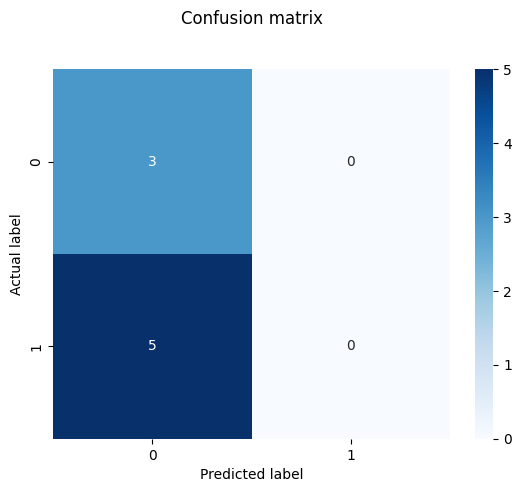

In [ ]:
cnf_matrix_plot(y_test, y_pred)

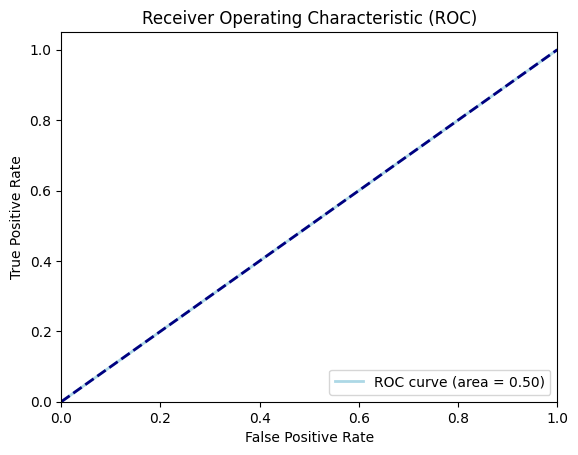

ROC AUC: 0.5


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, hgbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "HistGBM", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **HistGBM (Tuning)**

In [ ]:
# histgbm = HistGradientBoostingClassifier()

# param_grid = {
#     'max_iter': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [4, 6, 8]
# }

# grid_search = GridSearchCV(estimator=histgbm, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
# histgbm = HistGradientBoostingClassifier()

# param_grid = {
#     'max_iter': [200],
#     'learning_rate': [0.01],
#     'max_depth': [4, 6, 8]
# }

# grid_search = GridSearchCV(estimator=histgbm, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best parameters:", grid_search.best_params_)
# print("Accuracy:", grid_search.score(X_test, y_test))

In [ ]:
start = time.time()
hgbm = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_iter=200)
hgbm.fit(X_train, y_train)
y_pred = hgbm.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

              precision    recall  f1-score   support

           0       0.38      1.00      0.55         3
           1       0.00      0.00      0.00         5

    accuracy                           0.38         8
   macro avg       0.19      0.50      0.27         8
weighted avg       0.14      0.38      0.20         8

Accuracy: 0.375
F1-Score: 0.20454545454545453
Precision: 0.140625
Recall: 0.375
Duration: 0.03666973114013672


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(hgbm, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.1s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.2s
[CV] START .....................................................................
[CV] END ..................

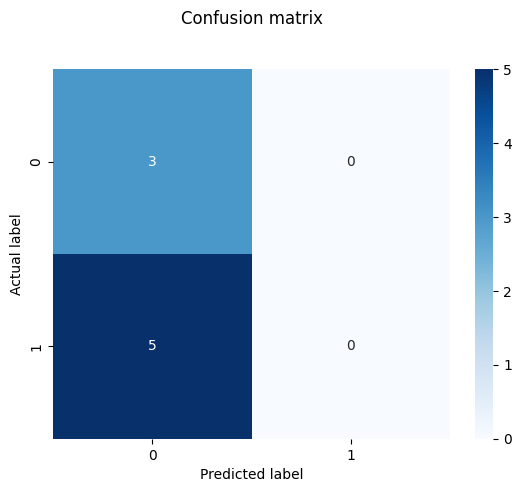

In [ ]:
cnf_matrix_plot(y_test, y_pred)

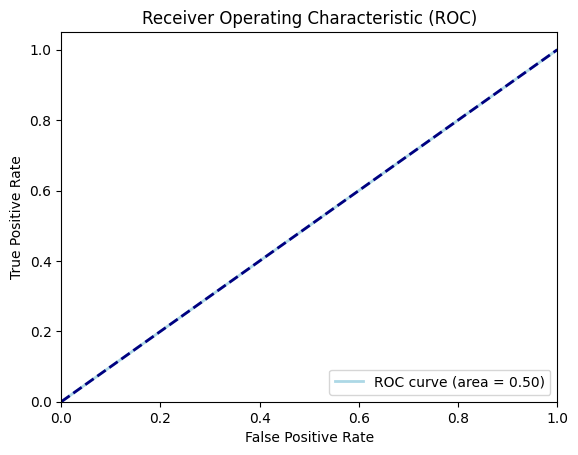

ROC AUC: 0.5


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, hgbm)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "HistGBM (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **NGBoost**

In [ ]:
start = time.time()
ngb = NGBClassifier()
ngb.fit(X_train, y_train)
y_pred = ngb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0739 val_loss=0.0000 scale=1.0000 norm=1.0830
[iter 200] loss=0.0500 val_loss=0.0000 scale=0.2500 norm=0.2639
[iter 300] loss=0.0458 val_loss=0.0000 scale=0.0625 norm=0.0657
[iter 400] loss=0.0433 val_loss=0.0000 scale=0.0312 norm=0.0328
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7500000000000001
Precision: 0.75
Recall: 0.75
Duration: 1.6830370426177979


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(ngb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2317 val_loss=0.0000 scale=2.0000 norm=2.6180
[iter 200] loss=0.1823 val_loss=0.0000 scale=1.0000 norm=1.2518
[iter 300] loss=0.1666 val_loss=0.0000 scale=0.5000 norm=0.6185
[iter 400] loss=0.1590 val_loss=0.0000 scale=0.2500 norm=0.3076
[CV] END ................................ score: (test=0.667) total time=   1.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    1.5s
[CV] START .....................................................................
[iter 0] loss=0.6931 val_loss=0.0000 scale=512.0000 norm=1024.0000
[iter 100] loss=0.0486 val_loss=0.0000 scale=8.0000 norm=8.4882
[iter 200] loss=0.0480 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0480 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0480 val_loss=0.0000 scale=0.0001 norm=0.0001
[CV] END ................................ score: (test=

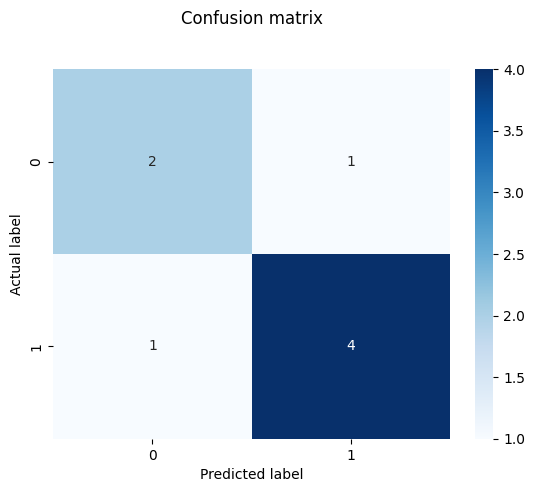

In [ ]:
cnf_matrix_plot(y_test, y_pred)

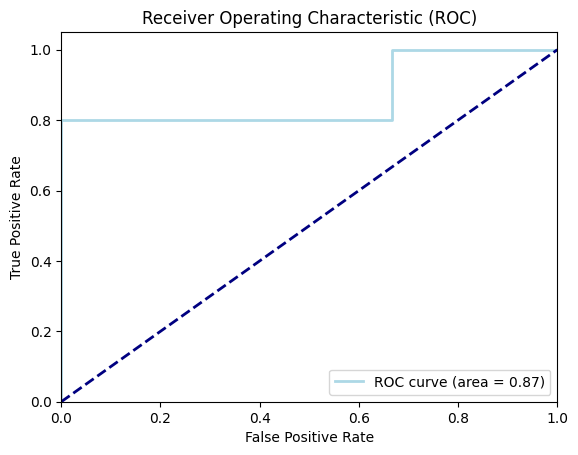

ROC AUC: 0.8666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, ngb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "NGBoost", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **NGBoost (Tuning)**

In [ ]:
# ngb = NGBClassifier(n_estimators=300, learning_rate=0.01)
# ngb.fit(X_train, y_train)
# y_pred = ngb.predict(X_test)

# accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
# accuracy

In [ ]:
start = time.time()
ngb = NGBClassifier(n_estimators=300, learning_rate=0.01)
ngb.fit(X_train, y_train)
y_pred = ngb.predict(X_test)
end = time.time()
duration = end - start

accuracy, f1_score, precision, recall = clf_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)
print("Duration:", duration)

[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0754 val_loss=0.0000 scale=1.0000 norm=1.0850
[iter 200] loss=0.0511 val_loss=0.0000 scale=0.2500 norm=0.2643
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8

Accuracy: 0.75
F1-Score: 0.7500000000000001
Precision: 0.75
Recall: 0.75
Duration: 0.6966795921325684


In [ ]:
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(ngb, X_train, y_train, cv=stratified_kf, scoring='accuracy', verbose=100)

mean_cv = cv_scores.mean()
best_cv = cv_scores.max()
print("Cross-Validation Accuracy scores for each fold:", cv_scores)
print("Average Accuracy score:", mean_cv)
print("Best Accuracy score:", best_cv)

[CV] START .....................................................................
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.2317 val_loss=0.0000 scale=2.0000 norm=2.6180
[iter 200] loss=0.1823 val_loss=0.0000 scale=1.0000 norm=1.2518
[CV] END ................................ score: (test=0.667) total time=   0.9s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.9s
[CV] START .....................................................................
[iter 0] loss=0.6931 val_loss=0.0000 scale=512.0000 norm=1024.0000
[iter 100] loss=0.0486 val_loss=0.0000 scale=8.0000 norm=8.4882
[iter 200] loss=0.0480 val_loss=0.0000 scale=0.0001 norm=0.0001
[CV] END ................................ score: (test=0.333) total time=   0.9s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    1.7s
[CV] START .....................................................................
[iter 0] loss=0.6931 val_loss=0.0000 scale=4.0000 norm=8.0000
[iter 100] loss=0.0861 val

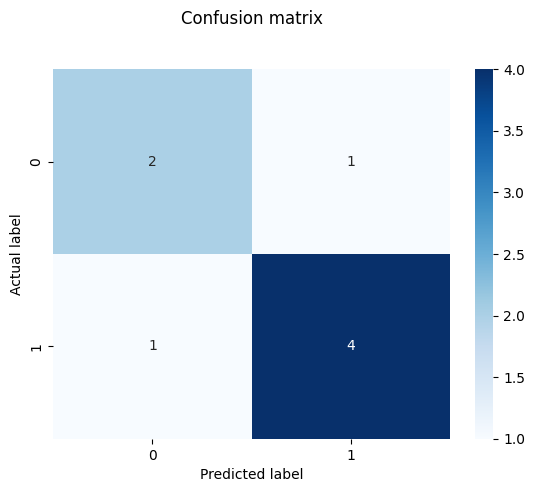

In [ ]:
cnf_matrix_plot(y_test, y_pred)

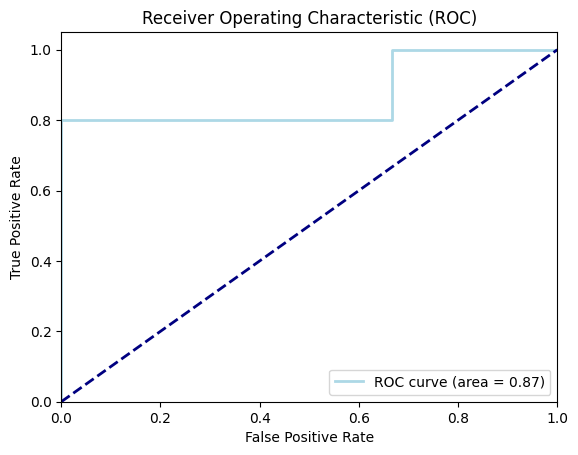

ROC AUC: 0.8666666666666667


In [ ]:
roc_auc = roc_auc_plot(X_test, y_test, ngb)
print("ROC AUC:", roc_auc)

In [ ]:
new_row = {"Model": "NGBoost (Tuning)", "Duration": duration, "Accuracy": accuracy, "F1 Score": f1_score, "Precision": precision, "Recall": recall, "ROC AUC": roc_auc, "Average CV": mean_cv, "Best CV": best_cv}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

## **Evaluation**

In [ ]:
acc = models.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
f1 = models.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
pr = models.sort_values(by="Precision", ascending=False).reset_index(drop=True)
rc = models.sort_values(by="Recall", ascending=False).reset_index(drop=True)
ra = models.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
ac = models.sort_values(by="Average CV", ascending=False).reset_index(drop=True)
bc = models.sort_values(by="Best CV", ascending=False).reset_index(drop=True)

mods = np.array(models['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = acc[acc['Model'] == mod].index
    score += index
    index = acc[f1['Model'] == mod].index
    score += index
    index = acc[pr['Model'] == mod].index
    score += index
    index = acc[rc['Model'] == mod].index
    score += index
    index = ra[ra['Model'] == mod].index
    score += index
    index = ac[ac['Model'] == mod].index
    score += index
    index = bc[bc['Model'] == mod].index
    score += index
    scores.append(score)

score(models)
models['Score'] = pd.DataFrame(scores)
models['Rank'] = models['Score'].rank().astype(int)
models.sort_values(by="Rank").reset_index(drop=True)

Model  Duration  Accuracy  F1 Score  Precision  Recall  \
0        CatBoost (Tuning)  0.358598     1.000  1.000000   1.000000   1.000   
1        AdaBoost (Tuning)  0.237244     1.000  1.000000   1.000000   1.000   
2                 CatBoost  2.868199     1.000  1.000000   1.000000   1.000   
3                 AdaBoost  0.252666     1.000  1.000000   1.000000   1.000   
4             GBM (Tuning)  1.005766     1.000  1.000000   1.000000   1.000   
5             KNN (Tuning)  0.004070     0.875  0.868182   0.895833   0.875   
6              Naive Bayes  0.005368     0.875  0.868182   0.895833   0.875   
7     Naive Bayes (Tuning)  0.006923     0.875  0.868182   0.895833   0.875   
8         XGBoost (Tuning)  0.350386     0.750  0.750000   0.750000   0.750   
9                      GBM  0.103761     0.875  0.876984   0.906250   0.875   
10  Decision Tree (Tuning)  0.003724     0.875  0.876984   0.906250   0.875   
11                 XGBoost  0.028342     0.625  0.630952   0.656250   0.625   
12                     SVM  0.007147     0.750  0.750000   0.750000   0.750   
13                 NGBoost  1.683037     0.750  0.750000   0.750000   0.750   
14            SVM (Tuning)  0.002908     0.750  0.750000   0.750000   0.750   
15           Decision Tree  0.007945     0.750  0.750000   0.850000   0.750   
16        NGBoost (Tuning)  0.696680     0.750  0.750000   0.750000   0.750   
17                     KNN  0.004565     0.625  0.630952   0.656250   0.625   
18                    LGBM  0.030745     0.375  0.204545   0.140625   0.375   
19           LGBM (Tuning)  0.123909     0.375  0.204545   0.140625   0.375   
20                 HistGBM  0.019797     0.375  0.204545   0.140625   0.375   
21        HistGBM (Tuning)  0.036670     0.375  0.204545   0.140625   0.375   

     ROC AUC  Average CV   Best CV  Score  Rank  
0   1.000000    0.600000  1.000000     13     1  
1   1.000000    0.666667  1.000000     20     2  
2   1.000000    0.600000  1.000000     23     3  
3   1.000000    0.566667  0.833333     26     4  
4   1.000000    0.433333  0.666667     29     5  
5   1.000000    0.533333  0.833333     40     6  
6   0.933333    0.600000  0.833333     44     7  
7   0.933333    0.633333  0.833333     49     8  
8   0.733333    0.666667  1.000000     57     9  
9   0.866667    0.500000  0.833333     59    10  
10  0.900000    0.500000  0.666667     62    11  
11  0.733333    0.566667  1.000000     88    12  
12  0.266667    0.500000  0.666667     90    13  
13  0.866667         NaN       NaN     94    14  
14  0.266667    0.500000  0.666667     99    15  
15  0.800000    0.466667  0.500000    100    16  
16  0.866667         NaN       NaN    111    17  
17  0.666667    0.500000  0.666667    114    18  
18  0.500000    0.500000  0.500000    115    19  
19  0.500000    0.500000  0.500000    120    20  
20  0.500000    0.500000  0.500000    126    21  
21  0.500000    0.500000  0.500000    138    22

The feature importance of each model varies greatly.